#***Notebook* Sebelas Maret Statistics Data Science (SMSDS) 2024**
## **Nama Tim**: Martabak Sukarasa
## **Anggota Tim**:
- ### **Marcell Christian Franky** $(ketua)$
 Departemen Matematika, Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Brawijaya, Malang. <br>
marcellchristian1603@gmail.com
<br>
- ### **German Mindo Simarmata**
Departemen Matematika, Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Brawijaya, Malang. <br>
germanmindos22@gmail.com
<br>
- ### **Muhammad Faizal**
Departemen Matematika, Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Brawijaya, Malang. <br>
faizzalmuh87@gmail.com
<br> <br>

In [ ]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.1
    Uninstalling kagglehub-0.3.1:
      Successfully uninstalled kagglehub-0.3.1


In [ ]:
!pip install kagglehub
import os
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

marcellchristianf_smsdsc_path = kagglehub.dataset_download('marcellchristianf/smsdsc')
marcellchristianf_sudah_clean_path = kagglehub.dataset_download('marcellchristianf/sudah-clean')
marcellchristianf_test_sudah_clean_reg_path = kagglehub.dataset_download('marcellchristianf/test-sudah-clean-reg')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1. PENDAHULUAN**

## 1.1 Latar Belakang Penelitian
Perubahan iklim yang semakin tidak menentu menyebabkan peningkatan variabilitas cuaca, termasuk intensitas curah hujan yang ekstrem. Hal ini seringkali memicu bencana seperti banjir dan longsor, serta mengganggu infrastruktur penting, termasuk jaringan listrik. Gangguan pada jaringan listrik dapat berdampak serius terhadap keselamatan dan kesehatan masyarakat, terutama saat terjadi cuaca ekstrem seperti badai (SMSDS, 2024).

Di Amerika Serikat, pemadaman listrik yang disebabkan oleh cuaca diperkirakan menimbulkan kerugian antara 20 miliar hingga 55 miliar setiap tahunnya, dengan sekitar 72% gangguan pada sistem tenaga listrik antara tahun 2010 hingga 2015 disebabkan oleh kondisi meteorologi yang buruk. Menurut SMSDS (2024), mengingat pentingnya membangun sistem distribusi listrik yang tangguh, pengembangan sistem peramalan mati listrik berbasis indikator cuaca menjadi solusi yang menjanjikan untuk mitigasi risiko bencana serta pemulihan yang lebih cepat pascabencana. Salah satu solusi untuk mengurangi dampak cuaca ekstrem terhadap jaringan listrik adalah mengembangkan sistem peramalan mati listrik berbasis indikator cuaca. Peramalan ini mencakup dua komponen utama.

1. **Peramalan Indikator Cuaca**: Menganalisis indikator cuaca seperti kecepatan angin, tekanan atmosfer, dan curah hujan untuk memprediksi kemungkinan terjadinya cuaca ekstrem.

2. **Peramalan Dampak pada Jaringan Listrik**: Memodelkan hubungan antara intensitas cuaca dan frekuensi mati listrik, memungkinkan sistem peringatan dini bagi operator untuk mengambil langkah mitigasi.

Pendekatan ini meningkatkan ketahanan jaringan listrik dan mengurangi risiko pemadaman serta kerugian ekonomi akibat cuaca ekstrem.

## 1.2 Tujuan Penelitian

Penelitian ini bertujuan untuk mengembangkan sistem peramalan berbasis indikator cuaca yang mampu memprediksi kemungkinan terjadinya cuaca ekstrem dan dampaknya pada jaringan listrik. Sistem ini diharapkan dapat memprediksi indikator cuaca seperti kecepatan angin, curah hujan, dan tekanan atmosfer, serta memodelkan dampaknya terhadap stabilitas jaringan listrik. Dengan adanya sistem peringatan dini, operator jaringan listrik dapat mengambil langkah-langkah mitigasi yang tepat, seperti memperkuat infrastruktur dan mengalokasikan sumber daya secara efisien sebelum terjadi bencana.

## 1.3 Manfaat Penelitian
Adapun manfaat dari analisis data ini adalah.

1. Bagi peneliti yaitu memberikan wawasan baru dalam pemodelan data cuaca ekstrem dan dampaknya pada jaringan listrik, serta pengembangan algoritma prediktif berbasis data *time series* yang lebih akurat.

2. Bagi pihak penyelenggara kompetisi yaitu membantu memajukan studi dan pengembangan solusi inovatif dalam mitigasi dampak cuaca ekstrem pada jaringan listrik, serta menemukan bakat-bakat baru di bidang *data science*.

3. Bagi pelaku industri yaitu peramalan ini dapat meningkatkan efisiensi operasional dalam merencanakan mitigasi risiko, mengurangi potensi kerugian, serta meningkatkan ketahanan infrastruktur terhadap cuaca ekstrem.

4. Bagi pemerintah yaitu hasil dari penelitian ini dapat menjadi dasar dalam penyusunan kebijakan dan regulasi untuk memperkuat ketahanan energi nasional, terutama dalam menghadapi bencana meteorologi yang semakin meningkat akibat perubahan iklim.

5. Bagi masyarakat yaitu masyarakat dapat lebih siap dalam menghadapi potensi pemadaman listrik yang disebabkan oleh cuaca ekstrem, sehingga dapat meminimalkan dampak pada kesehatan, keselamatan, dan aktivitas sehari-hari.

Melalui integrasi peramalan cuaca dan dampaknya pada sistem distribusi listrik, diharapkan dapat tercipta sistem jaringan listrik yang lebih tangguh dan andal dalam menghadapi perubahan iklim di masa depan.

# 2. Metode Penelitian
Penelitian ini menggunakan bahasa pemrograman **Python** sebagai perangkat lunak utama untuk melakukan analisis data dan pengembangan model prediktif. Python dipilih karena kemampuannya yang fleksibel dan kuat dalam menangani data *time series*, serta memiliki berbagai pustaka yang mendukung tugas-tugas klasifikasi dan regresi. Beberapa pustaka pendukung seperti **Pandas** dan **NumPy** untuk manipulasi data, serta **scikit-learn** untuk imputasi data yang hilang menggunakan KNN Imputer dan normalisasi data dengan **StandardScaler** dan **MinMaxScaler**. Selain itu, **ColumnTransformer** digunakan untuk menerapkan transformasi berbeda pada subset kolom, sementara **AutoGluon** dengan **TabularPredictor** membantu dalam otomatisasi pemodelan *machine learning*. Kombinasi pustaka ini mempermudah pembersihan, normalisasi, dan prediksi berbasis data *time series*. Secara keseluruhan, penelitian akan dilakukan dengan mempersiapkan *dataset*, melakukan *Exploratory Data Analysis*, *preprocessing data*, *feature engineering*, dan *modelling*.

# EDA
## disini kami akan membahas insight - insight yang terdapat pada data kami.
## Nantinya setelah EDA, kami akan menunjukkan code preprocessing dan modelling

In [ ]:
import pandas as pd
import numpy as np

def clean_and_read_csv(file_path):
    # Read all lines from the file
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        lines = file.readlines()

    # Split the first line to get headers
    headers = lines[0].strip().split(';')

    # Initialize a list to store data rows
    data = []

    # Process each subsequent line
    for line in lines[1:]:
        # Split the line by ';' to get each value
        row = line.strip().split(';')

        # Replace '#N/A' with np.nan
        row = [np.nan if value == '#N/A' else value for value in row]
        # Check if the row length matches headers; if not, pad with NaN
        if len(row) < len(headers):
            row.extend([np.nan] * (len(headers) - len(row)))
        elif len(row) > len(headers):
            row = row[:len(headers)]  # Truncate if row has more values than headers

        # Append the cleaned row to the data list
        data.append(row)

    # Create a DataFrame with headers
    df = pd.DataFrame(data, columns=headers)

    return df

# Read and clean the CSV files
train = clean_and_read_csv('Train Set.csv')
test = clean_and_read_csv('Test Set.csv')
submission = clean_and_read_csv('Submission.csv')

# Display the first few rows to check if data loaded correctly
print(train.head())
print(test.head())
print(submission.head())


  ID              time temperature_2m (EEC) relative_humidity_2m (%)  \
0  1  2022-01-01T00:00                    NaN                       91   
1  2  2022-01-01T01:00                   22,2                       89   
2  3  2022-01-01T02:00                    NaN                       87   
3  4  2022-01-01T03:00                   22,5                       86   
4  5  2022-01-01T04:00                   22,7                       84   

  dew_point_2m (EEC) apparent_temperature (EEC) precipitation (mm)  \
0                 20,7                         25,7                0,1   
1                 20,3                         25,5                  0   
2                 20,2                         25,4                  0   
3                 20,1                         25,1                  0   
4                 19,9                         25,6                  0   

  pressure_msl (hPa) surface_pressure (hPa) cloud_cover (%)  ...  \
0             1011,4                  987,

In [ ]:
train.rename(columns={
    'temperature_2m (EEC)': 'temperature_2m (°C)',
    'relative_humidity_2m (%)': 'relative_humidity_2m (%)',
    'dew_point_2m (EEC)': 'dew_point_2m (°C)',
    'apparent_temperature (EEC)': 'apparent_temperature (°C)',
    'pressure_msl (hPa)': 'pressure_msl (hPa)',
    'surface_pressure (hPa)': 'surface_pressure (hPa)',
    'cloud_cover (%)': 'cloud_cover (%)',
    'cloud_cover_low (%)': 'cloud_cover_low (%)',
    'cloud_cover_mid (%)': 'cloud_cover_mid (%)',
    'cloud_cover_high (%)': 'cloud_cover_high (%)',
    'vapour_pressure_deficit (kPa)': 'vapour_pressure_deficit (kPa)',
    'wind_speed_10m (km/h)': 'wind_speed_10m (km/h)',
    'wind_speed_100m (km/h)': 'wind_speed_100m (km/h)',
    'wind_direction_10m (EE)': 'wind_direction_10m (°)',
    'wind_direction_100m (EE)': 'wind_direction_100m (°)',
    'wind_gusts_10m (km/h)': 'wind_gusts_10m (km/h)',
    'soil_temperature_0_to_7cm (EEC)': 'soil_temperature_0_to_7cm (°C)',
    'soil_temperature_7_to_28cm (EEC)': 'soil_temperature_7_to_28cm (°C)',
    'soil_temperature_28_to_100cm (EEC)': 'soil_temperature_28_to_100cm (°C)',
    'soil_temperature_100_to_255cm (EEC)': 'soil_temperature_100_to_255cm (°C)',
    'soil_moisture_0_to_7cm (m?/m?)': 'soil_moisture_0_to_7cm (m³/m³)',
    'soil_moisture_7_to_28cm (m?/m?)': 'soil_moisture_7_to_28cm (m³/m³)',
    'soil_moisture_28_to_100cm (m?/m?)': 'soil_moisture_28_to_100cm (m³/m³)',
    'soil_moisture_100_to_255cm (m?/m?)': 'soil_moisture_100_to_255cm (m³/m³)',
    'shortwave_radiation (W/m?)': 'shortwave_radiation (W/m²)',
    'direct_radiation (W/m?)': 'direct_radiation (W/m²)',
    'diffuse_radiation (W/m?)': 'diffuse_radiation (W/m²)',
    'direct_normal_irradiance (W/m?)': 'direct_normal_irradiance (W/m²)',
    'global_tilted_irradiance (W/m?)': 'global_tilted_irradiance (W/m²)',
    'terrestrial_radiation (W/m?)': 'terrestrial_radiation (W/m²)',
    'is_day ()': 'is_day ()',
    'sunshine_duration (s)': 'sunshine_duration (s)',
}, inplace=True)


In [ ]:
test.rename(columns={
    'temperature_2m (EEC)': 'temperature_2m (°C)',
    'relative_humidity_2m (%)': 'relative_humidity_2m (%)',
    'dew_point_2m (EEC)': 'dew_point_2m (°C)',
    'apparent_temperature (EEC)': 'apparent_temperature (°C)',
    'pressure_msl (hPa)': 'pressure_msl (hPa)',
    'surface_pressure (hPa)': 'surface_pressure (hPa)',
    'cloud_cover (%)': 'cloud_cover (%)',
    'cloud_cover_low (%)': 'cloud_cover_low (%)',
    'cloud_cover_mid (%)': 'cloud_cover_mid (%)',
    'cloud_cover_high (%)': 'cloud_cover_high (%)',
    'vapour_pressure_deficit (kPa)': 'vapour_pressure_deficit (kPa)',
    'wind_speed_10m (km/h)': 'wind_speed_10m (km/h)',
    'wind_speed_100m (km/h)': 'wind_speed_100m (km/h)',
    'wind_direction_10m (EE)': 'wind_direction_10m (°)',
    'wind_direction_100m (EE)': 'wind_direction_100m (°)',
    'wind_gusts_10m (km/h)': 'wind_gusts_10m (km/h)',
    'soil_temperature_0_to_7cm (EEC)': 'soil_temperature_0_to_7cm (°C)',
    'soil_temperature_7_to_28cm (EEC)': 'soil_temperature_7_to_28cm (°C)',
    'soil_temperature_28_to_100cm (EEC)': 'soil_temperature_28_to_100cm (°C)',
    'soil_temperature_100_to_255cm (EEC)': 'soil_temperature_100_to_255cm (°C)',
    'soil_moisture_0_to_7cm (m?/m?)': 'soil_moisture_0_to_7cm (m³/m³)',
    'soil_moisture_7_to_28cm (m?/m?)': 'soil_moisture_7_to_28cm (m³/m³)',
    'soil_moisture_28_to_100cm (m?/m?)': 'soil_moisture_28_to_100cm (m³/m³)',
    'soil_moisture_100_to_255cm (m?/m?)': 'soil_moisture_100_to_255cm (m³/m³)',
    'shortwave_radiation (W/m?)': 'shortwave_radiation (W/m²)',
    'direct_radiation (W/m?)': 'direct_radiation (W/m²)',
    'diffuse_radiation (W/m?)': 'diffuse_radiation (W/m²)',
    'direct_normal_irradiance (W/m?)': 'direct_normal_irradiance (W/m²)',
    'global_tilted_irradiance (W/m?)': 'global_tilted_irradiance (W/m²)',
    'terrestrial_radiation (W/m?)': 'terrestrial_radiation (W/m²)',
    'is_day ()': 'is_day ()',
    'sunshine_duration (s)': 'sunshine_duration (s)',
}, inplace=True)


In [ ]:
train_label_bin = train['electricity_shutdown']
train_label_reg = train['precipitation (mm)']
id_train = train['ID']
id_test = test['ID']
train.drop(['electricity_shutdown', 'precipitation (mm)'], axis=1, inplace=True)

In [ ]:
df_merge = pd.concat([train, test], axis=0).reset_index(drop=True)
df_merge

,ID,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),...,soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),is_day (),sunshine_duration (s)
0,1,2022-01-01T00:00,NaN,91,"20,7","25,7","1011,4","987,2",52,3,...,"0,269","0,323",0,0,0,0,0,0,0,0
1,2,2022-01-01T01:00,"22,2",89,"20,3","25,5","1010,9","986,7",NaN,NaN,...,"0,269","0,323",0,0,0,0,0,0,0,0
2,3,2022-01-01T02:00,NaN,87,"20,2","25,4",1010,"985,8",42,7,...,"0,269","0,323",0,0,0,0,0,0,0,0
3,4,2022-01-01T03:00,"22,5",86,"20,1","25,1",1010,"985,8",43,8,...,"0,268","0,323",0,0,0,0,0,0,0,0
4,5,2022-01-01T04:00,"22,7",84,"19,9","25,6","1009,8","985,7",NaN,13,...,NaN,"0,323",0,0,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,21884,2024-06-30T19:00,"24,4",91,"22,9","29,1","1011,3","987,3",75,NaN,...,NaN,"0,271",0,0,0,0,0,0,0,0
21884,21885,2024-06-30T20:00,"24,1",93,"22,9",29,"1012,1",988,76,45,...,"0,181","0,271",0,0,0,0,0,0,0,0
21885,21886,2024-06-30T21:00,"24,5",89,"22,5","29,5","1012,6","988,5",85,59,...,"0,181","0,271",0,0,0,0,0,0,0,NaN
21886,21887,2024-06-30T22:00,"23,2",95,"22,4",28,"1012,7","988,5",53,31,...,"0,181","0,271",0,0,0,0,0,NaN,0,0


In [ ]:
df_merge.columns

Index(['ID', 'time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'is_da

In [ ]:
def convert_comma_to_float(df):
    for column in df.columns:
        # Cek apakah kolom bertipe objek (string)
        if df[column].dtype == 'object':
            # Ganti koma dengan titik dan konversi ke float
            df[column] = df[column].str.replace(',', '.').astype(float)
    return df
# Convert 'date' column to datetime
df_merge['time'] = pd.to_datetime(df_merge['time'])

df_merge['year'] = df_merge['time'].dt.year
df_merge['month'] = df_merge['time'].dt.month
df_merge['day'] = df_merge['time'].dt.day
df_merge['hour'] = df_merge['time'].dt.hour

merge_time = df_merge['time']
merge_time

df_merge.drop('time', axis=1, inplace=True)
df_merge.drop('ID', axis=1, inplace=True)
df_merge = convert_comma_to_float(df_merge)

df_merge

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),...,diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),is_day (),sunshine_duration (s),year,month,day,hour
0,NaN,91.0,20.7,25.7,1011.4,987.2,52.0,3.0,32.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,0
1,22.2,89.0,20.3,25.5,1010.9,986.7,NaN,NaN,17.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,1
2,NaN,87.0,20.2,25.4,1010.0,985.8,42.0,7.0,10.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,2
3,22.5,86.0,20.1,25.1,1010.0,985.8,43.0,8.0,9.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,1,3
4,22.7,84.0,19.9,25.6,1009.8,985.7,NaN,13.0,10.0,100.0,...,0.0,0.0,0.0,NaN,0.0,0.0,2022,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,24.4,91.0,22.9,29.1,1011.3,987.3,75.0,NaN,3.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2024,6,30,19
21884,24.1,93.0,22.9,29.0,1012.1,988.0,76.0,45.0,10.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2024,6,30,20
21885,24.5,89.0,22.5,29.5,1012.6,988.5,85.0,59.0,7.0,93.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2024,6,30,21
21886,23.2,95.0,22.4,28.0,1012.7,988.5,53.0,31.0,6.0,71.0,...,0.0,0.0,0.0,NaN,0.0,0.0,2024,6,30,22


In [ ]:
df_merge.describe()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),...,diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),is_day (),sunshine_duration (s),year,month,day,hour
count,11900.000000,19682.000000,21888.000000,21888.000000,21888.000000,19624.000000,16427.000000,17439.000000,18638.000000,21888.000000,...,21888.000000,21888.000000,21888.000000,19769.000000,21888.000000,19735.000000,21888.000000,21888.000000,21888.000000,21888.000000
mean,24.862697,84.072554,21.826745,29.019157,1010.953490,986.963183,56.070494,29.810081,21.426119,71.330683,...,76.263158,188.094846,206.511970,416.617796,0.506990,1313.388251,2022.799342,5.922149,15.711623,11.500000
std,2.467054,10.110292,1.606919,3.103297,2.008679,1.914263,29.717156,32.204056,27.799068,38.983856,...,100.498323,266.988537,281.274254,500.244393,0.499963,1689.449312,0.748026,3.400199,8.790718,6.922345
min,16.700000,36.000000,13.100000,17.100000,1004.600000,981.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,1.000000,1.000000,0.000000
25%,23.200000,79.000000,21.000000,27.000000,1009.600000,985.600000,33.000000,6.000000,2.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,3.000000,8.000000,5.750000
50%,24.400000,87.000000,22.000000,28.800000,1010.900000,986.900000,51.000000,18.000000,10.000000,98.000000,...,7.000000,0.000000,8.000000,75.100000,1.000000,0.000000,2023.000000,6.000000,16.000000,11.500000
75%,26.600000,92.000000,22.900000,30.900000,1012.300000,988.300000,86.000000,40.000000,28.000000,100.000000,...,140.000000,380.925000,396.250000,910.400000,1.000000,3600.000000,2023.000000,9.000000,23.000000,17.250000
max,34.500000,100.000000,26.500000,39.400000,1018.500000,994.300000,100.000000,100.000000,100.000000,100.000000,...,481.000000,943.500000,1039.000000,1387.300000,1.000000,3600.000000,2024.000000,12.000000,31.000000,23.000000


Di sini kami mengecek dan mengurutkan jumlah nilai null pada tiap fitur yang kemudian akan berguna dalam pengisian nilai null.

In [ ]:
# Hitung jumlah null di setiap kolom
null_counts = df_merge.isnull().sum()

# Hitung total baris
total_rows = len(df_merge)

# Hitung persentase null untuk setiap kolom
null_percentages = (null_counts / total_rows) * 100

# Gabungkan jumlah null dan persentasenya
null_stats = pd.concat([null_counts, null_percentages], axis=1, keys=['Jumlah Null', 'Persentase Null (%)'])

# Urutkan berdasarkan jumlah null terbanyak
sorted_null_stats = null_stats.sort_values('Jumlah Null', ascending=False)

# Tampilkan hasil
print(sorted_null_stats)

                                    Jumlah Null  Persentase Null (%)
temperature_2m (°C)                        9988            45.632310
cloud_cover (%)                            5461            24.949744
cloud_cover_low (%)                        4449            20.326206
wind_speed_10m (km/h)                      4384            20.029240
wind_gusts_10m (km/h)                      3273            14.953399
cloud_cover_mid (%)                        3250            14.848319
surface_pressure (hPa)                     2264            10.343567
wind_direction_100m (°)                    2246            10.261330
relative_humidity_2m (%)                   2206            10.078582
vapour_pressure_deficit (kPa)              2205            10.074013
soil_moisture_28_to_100cm (m³/m³)          2192            10.014620
sunshine_duration (s)                      2153             9.836440
wind_direction_10m (°)                     2138             9.767909
terrestrial_radiation (W/m²)      

### Sementara kami mengisi nilai null dengan KKNImputer pada tiap fitur untuk keperluan Analisis Data Eksploratori

In [ ]:
from sklearn.impute import KNNImputer

# Inisialisasi KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Anda bisa menyesuaikan nilai n_neighbors

# Terapkan KNN imputer untuk kolom-kolom yang diinginkan
df_merge_EDA = imputer.fit_transform(df_merge)
df_merge_EDA = pd.DataFrame(df_merge_EDA, columns=df_merge.columns)

## **Distribution of Each Features**

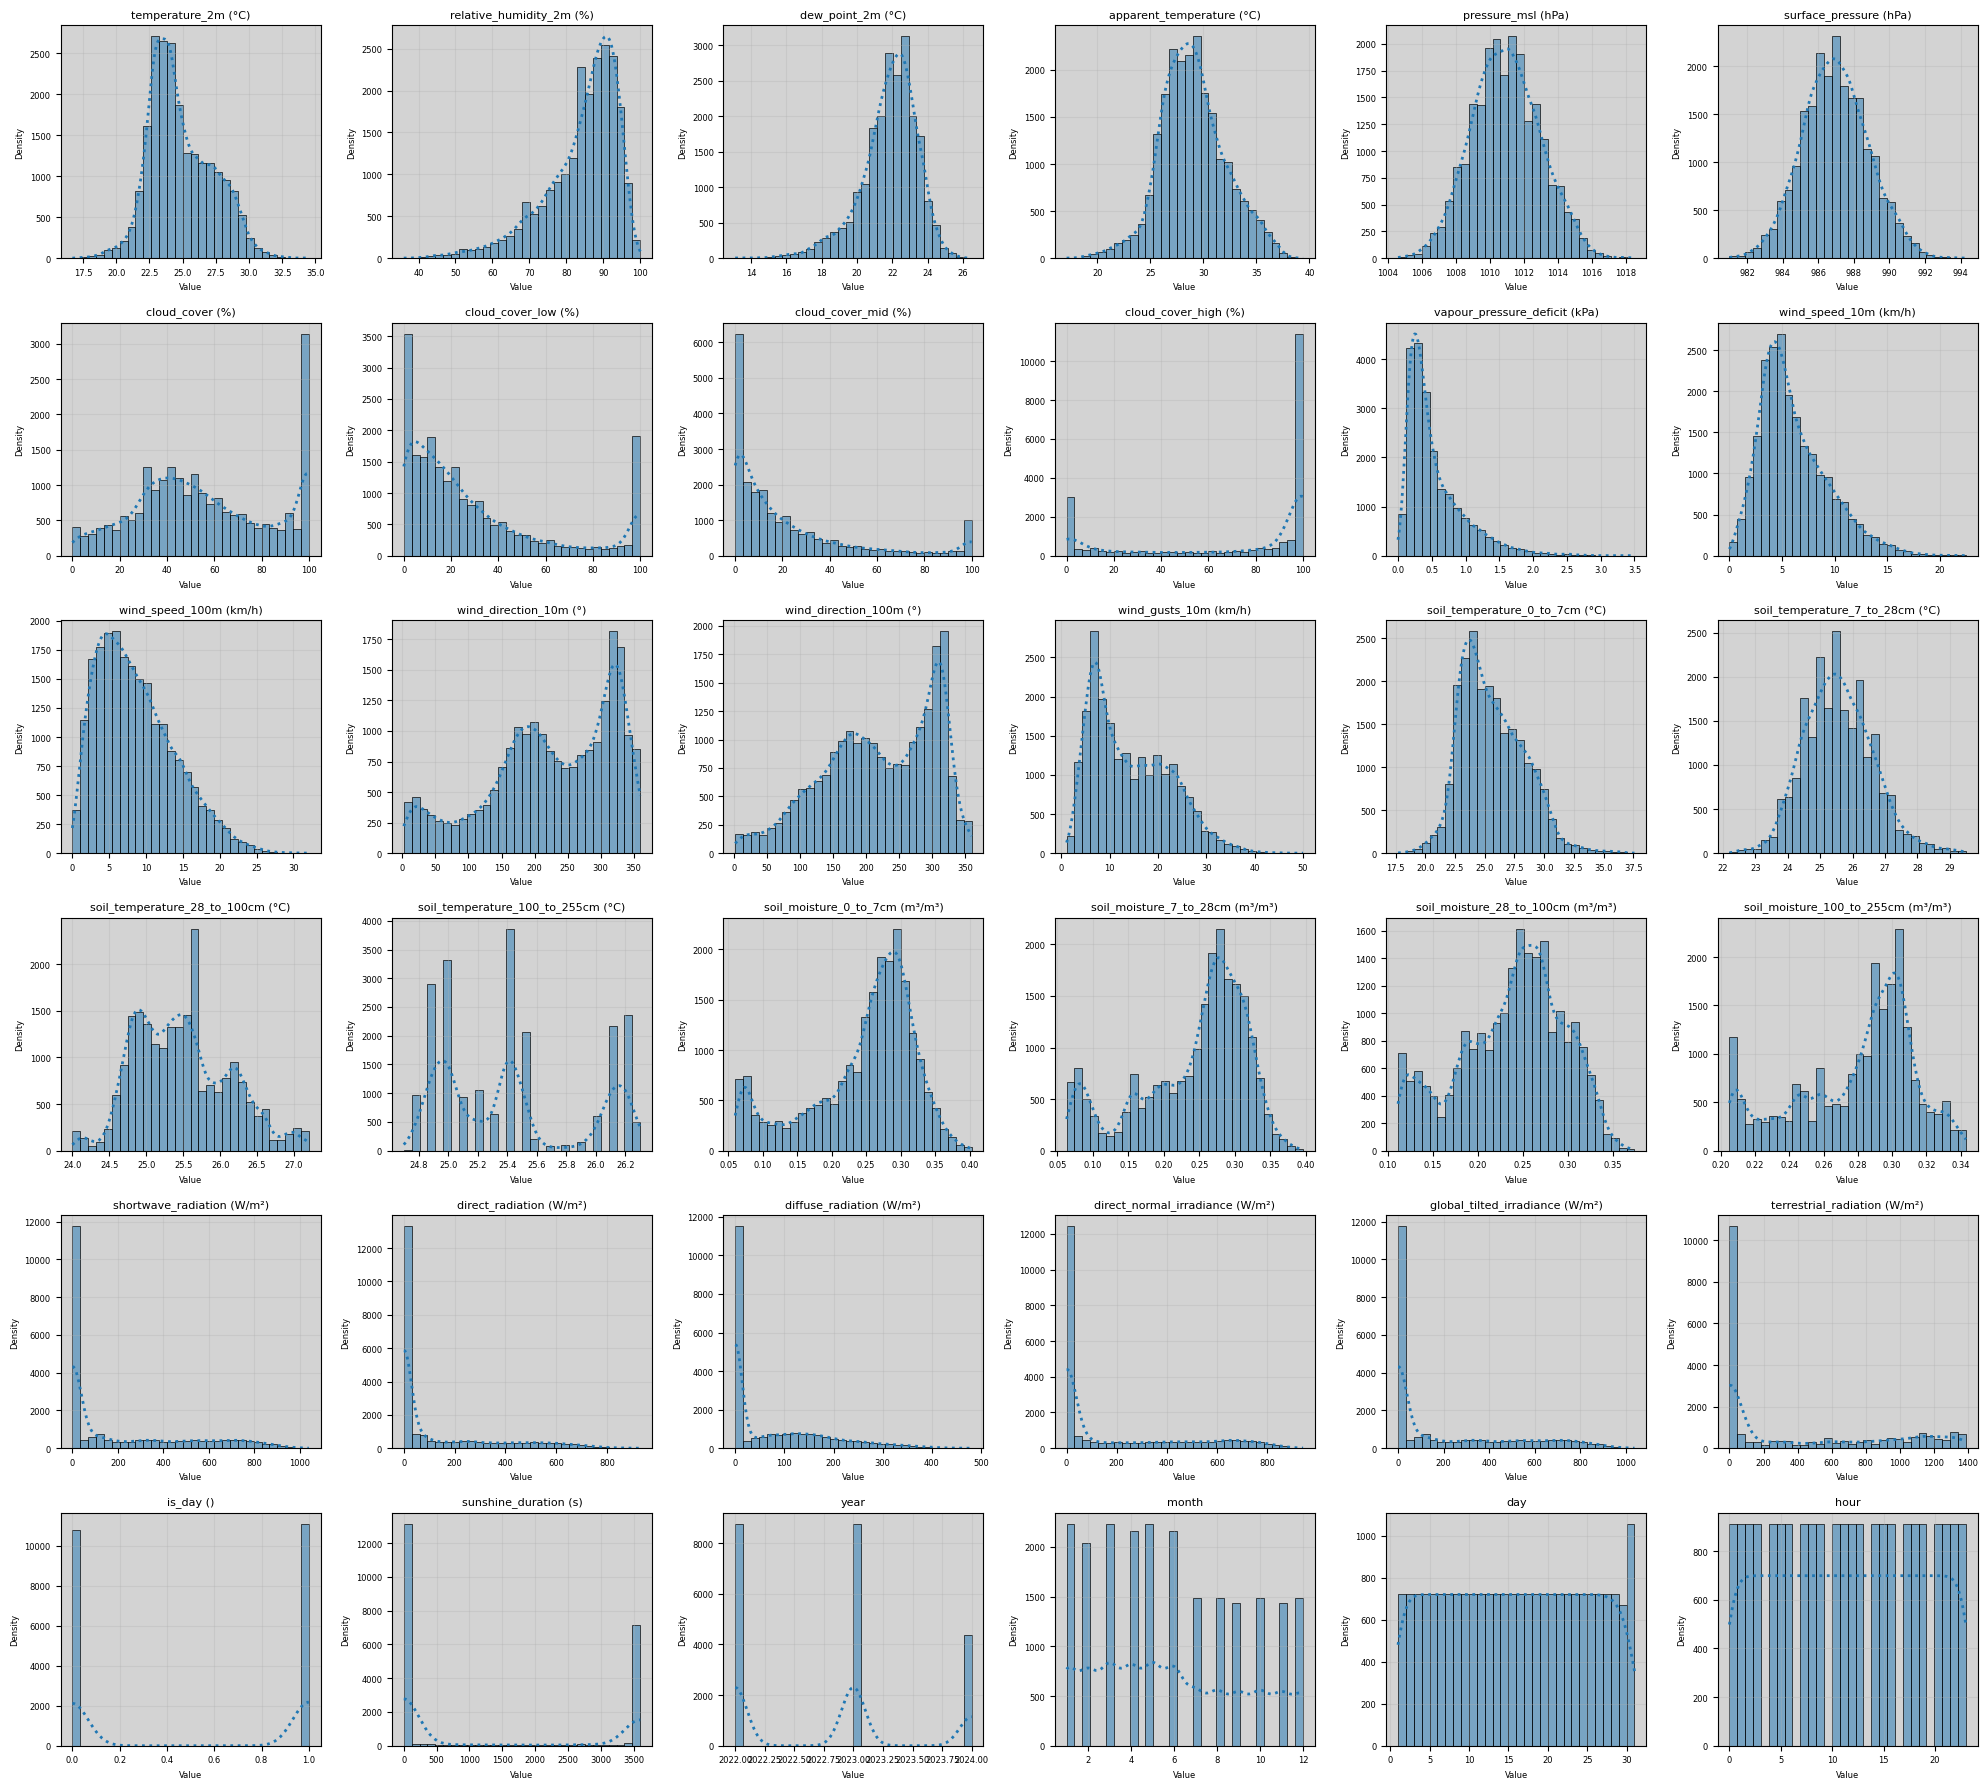

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

num_cols = len(df_merge_EDA.columns)
num_rows = (num_cols + 5) // 6  # Menghitung jumlah baris yang diperlukan untuk 6 kolom

# Create a custom colormap ranging from green to red
colors = [(0, 1, 0), (1, 0, 0)]  # Green to Red
cmap = LinearSegmentedColormap.from_list('green_to_red', colors, N=100)

fig, axs = plt.subplots(num_rows, 6, figsize=(20, num_rows*3))  # Mengubah ukuran figur dan jumlah kolom

for i in range(num_rows):
    for j in range(6):
        col_index = i * 6 + j
        if col_index < num_cols:
            col_name = df_merge_EDA.columns[col_index]
            temp_val = df_merge_EDA[col_name].dropna().values

            sns.histplot(
                temp_val,
                bins=30,  # Mengurangi jumlah bins untuk grafik yang lebih kecil
                kde=True,
                line_kws={'color': 'darkcyan', 'lw': 2, 'ls': ':'},  # Mengurangi ketebalan garis
                edgecolor='black',
                ax=axs[i, j]
            )

            # Mengecilkan ukuran font judul dan label
            axs[i, j].set_title(f'{col_name}', fontsize=8)  # Menghapus 'Distribution of' untuk menghemat ruang
            axs[i, j].set_xlabel('Value', fontsize=6)
            axs[i, j].set_ylabel('Density', fontsize=6)
            axs[i, j].tick_params(labelsize=6)  # Mengecilkan ukuran font tick labels
            axs[i, j].grid(True, alpha=0.3)  # Mengurangi opasitas grid
            axs[i, j].set_facecolor('lightgray')  # Set background color

            # Set colormap for histogram bars based on value
            axs[i, j].set_prop_cycle('color',
                plt.cm.ScalarMappable(cmap=cmap).to_rgba(temp_val)
            )
        else:
            axs[i, j].axis('off')  # Mematikan axis untuk subplot yang tidak digunakan

plt.tight_layout()
plt.show()

Terlihat bahwa distribusi tiap fitur tidak ada yang berdistribusi normal. Hal ini berguna dalam penentuan normalisasi yang kami gunakan

In [ ]:
labelReg = train_label_reg.str.replace(',', '.').astype(float)
labelReg = labelReg.fillna(labelReg.mean())

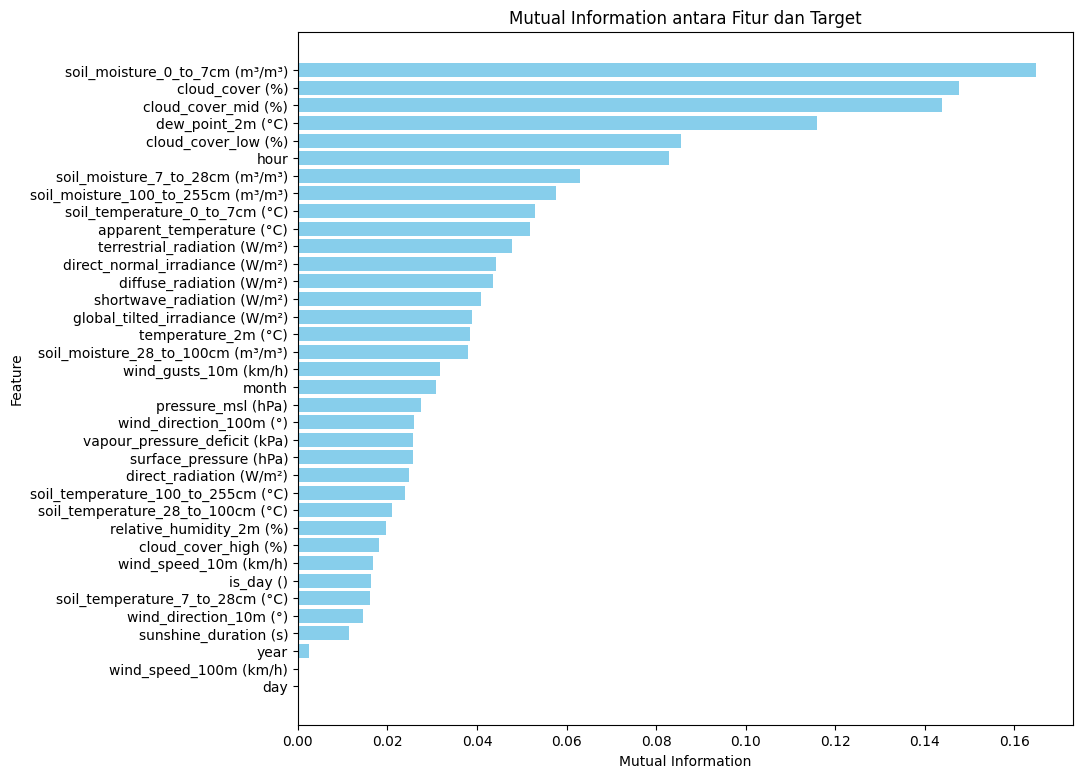

In [ ]:
from sklearn.feature_selection import mutual_info_regression
X = df_merge_EDA.copy()[:len(train)]
y = labelReg
# Hitung Mutual Information untuk tiap fitur
mi = mutual_info_regression(X, y, discrete_features='auto')

# Buat DataFrame untuk memudahkan visualisasi
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Visualisasi menggunakan bar plot
plt.figure(figsize=(10, 9))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Mutual Information antara Fitur dan Target')
plt.gca().invert_yaxis()  # Agar fitur dengan MI terbesar ada di atas
plt.show()

Terlihat bahwa fitur kelembapan tanah dan suhu tanah memiliki korelasi yang dominan

## **Comparison Against Time**

Di sini kami ingin melihat bagaimana perkembangan fitur-fitur yang ada terhadap waktu.

In [ ]:
df_merge_EDA.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'is_day ()', 'sunshi

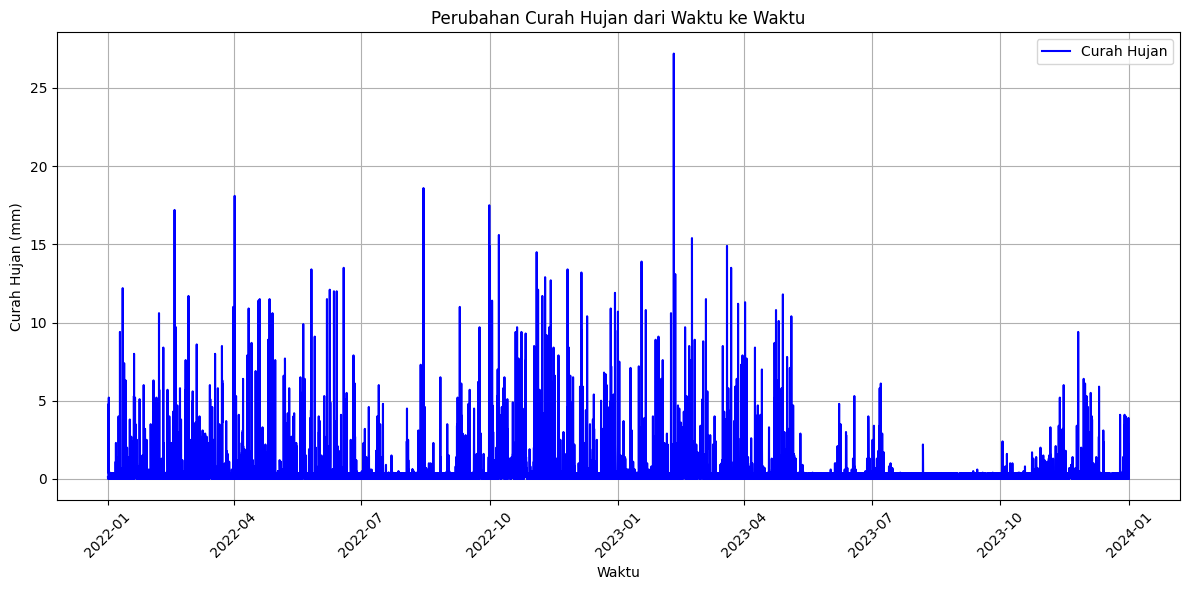

In [ ]:
X = merge_time.copy()[:len(train)]
y = labelReg

plt.figure(figsize=(12, 6))  # Tentukan ukuran plot
plt.plot(X, y, color='b', label='Curah Hujan')
plt.title('Perubahan Curah Hujan dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)  # Memutar label pada sumbu X agar lebih mudah dibaca
plt.grid(True)
plt.legend()
plt.tight_layout()  # Agar label tidak terpotong
plt.show()


terdapat curah hujan yang terbilang ekstrem pada rentang bulan Januari 2023 sampai April 2023

In [ ]:
# Konversi timestamp ke format datetime jika belum
df_merge_EDA['timestamp'] = pd.to_datetime(merge_time)

# Filter data untuk tahun 2023
df_2023 = df_merge_EDA[(df_merge_EDA['timestamp'] >= '2023-02-01') & (df_merge_EDA['timestamp'] <= '2023-03-31')]

In [ ]:
df_merge.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'is_day ()', 'sunshi

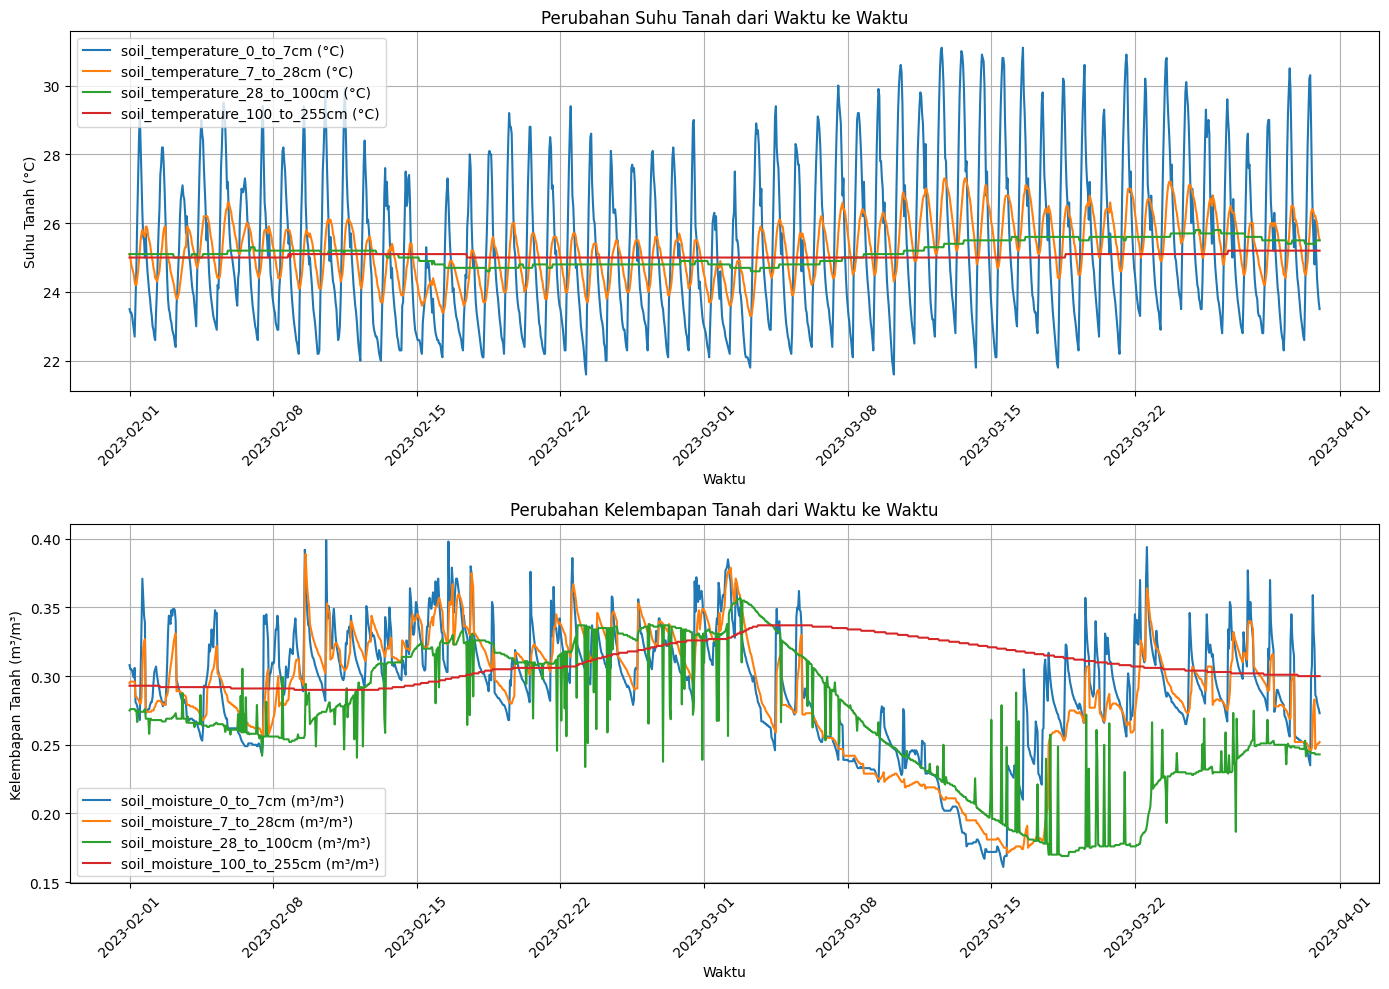

In [ ]:
import matplotlib.pyplot as plt

# List fitur suhu tanah yang ingin divisualisasikan
temperature_features = [
    'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)'
]

# List fitur kelembapan tanah yang ingin divisualisasikan
moisture_features = [
    'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)'
]

# Buat figure dengan dua subplot (1x2 grid)
plt.figure(figsize=(14, 10))

# Subplot 1: Suhu Tanah
plt.subplot(2, 1, 1)
for feature in temperature_features:
    plt.plot(df_2023['timestamp'], df_2023[feature], label=feature)
plt.title('Perubahan Suhu Tanah dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Suhu Tanah (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Subplot 2: Kelembapan Tanah
plt.subplot(2, 1, 2)
for feature in moisture_features:
    plt.plot(df_2023['timestamp'], df_2023[feature], label=feature)
plt.title('Perubahan Kelembapan Tanah dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Kelembapan Tanah (m³/m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Mengatur tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()

Dari sini terlihat bahwa saat curah hujan tinggi maka suhu tanah akan menurun sedangkan kelembapan tanah justru meningkat.

Selanjutnya akan ditampilkan kondisi di permukaan berdasarkan waktu.

In [ ]:
df_merge.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'is_day ()', 'sunshi

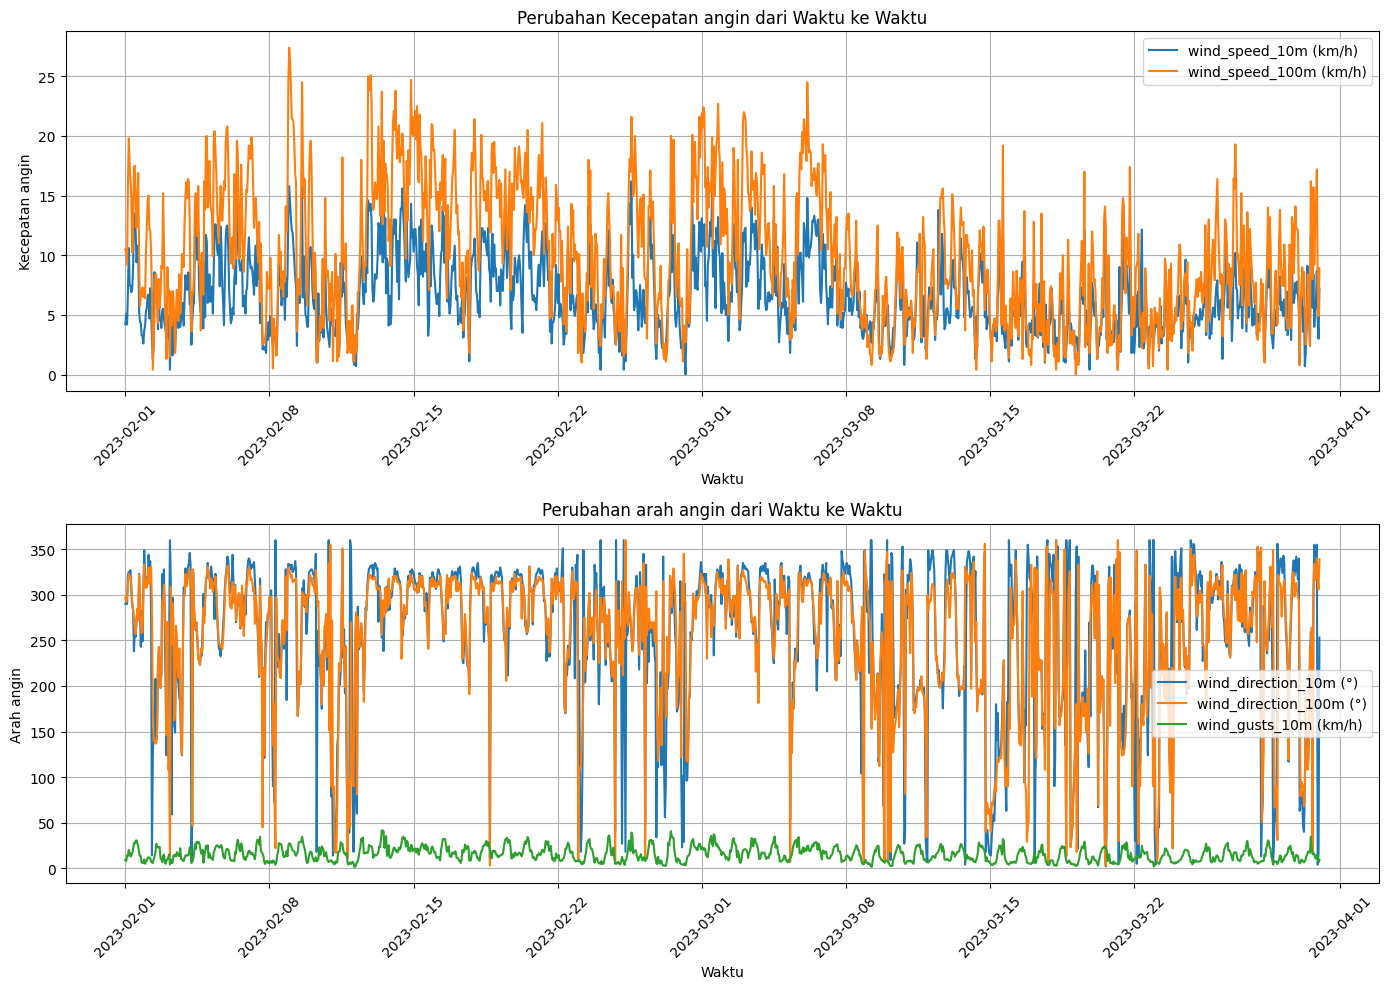

In [ ]:
import matplotlib.pyplot as plt

# List fitur suhu tanah yang ingin divisualisasikan
wind_speed_features = [
    'wind_speed_10m (km/h)','wind_speed_100m (km/h)'
]

# List fitur kelembapan tanah yang ingin divisualisasikan
other_wind_features = [
    'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)'
]

# Buat figure dengan dua subplot (1x2 grid)
plt.figure(figsize=(14, 10))

# Subplot 1: Kecepatan angin
plt.subplot(2, 1, 1)
for feature in wind_speed_features:
    plt.plot(df_2023['timestamp'], df_2023[feature], label=feature)
plt.title('Perubahan Kecepatan angin dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan angin')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Subplot 2: Arah angin
plt.subplot(2, 1, 2)
for feature in other_wind_features:
    plt.plot(df_2023['timestamp'], df_2023[feature], label=feature)
plt.title('Perubahan arah angin dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Arah angin')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Mengatur tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()

Kecepatan dan arah angin menunjukkan variabilitas yang signifikan. Kecepatan angin di ketinggian 100 meter cenderung lebih tinggi dibandingkan 10 meter. Pola fluktuasi ini penting untuk memprediksi cuaca ekstrem yang berpotensi mengganggu jaringan listrik.

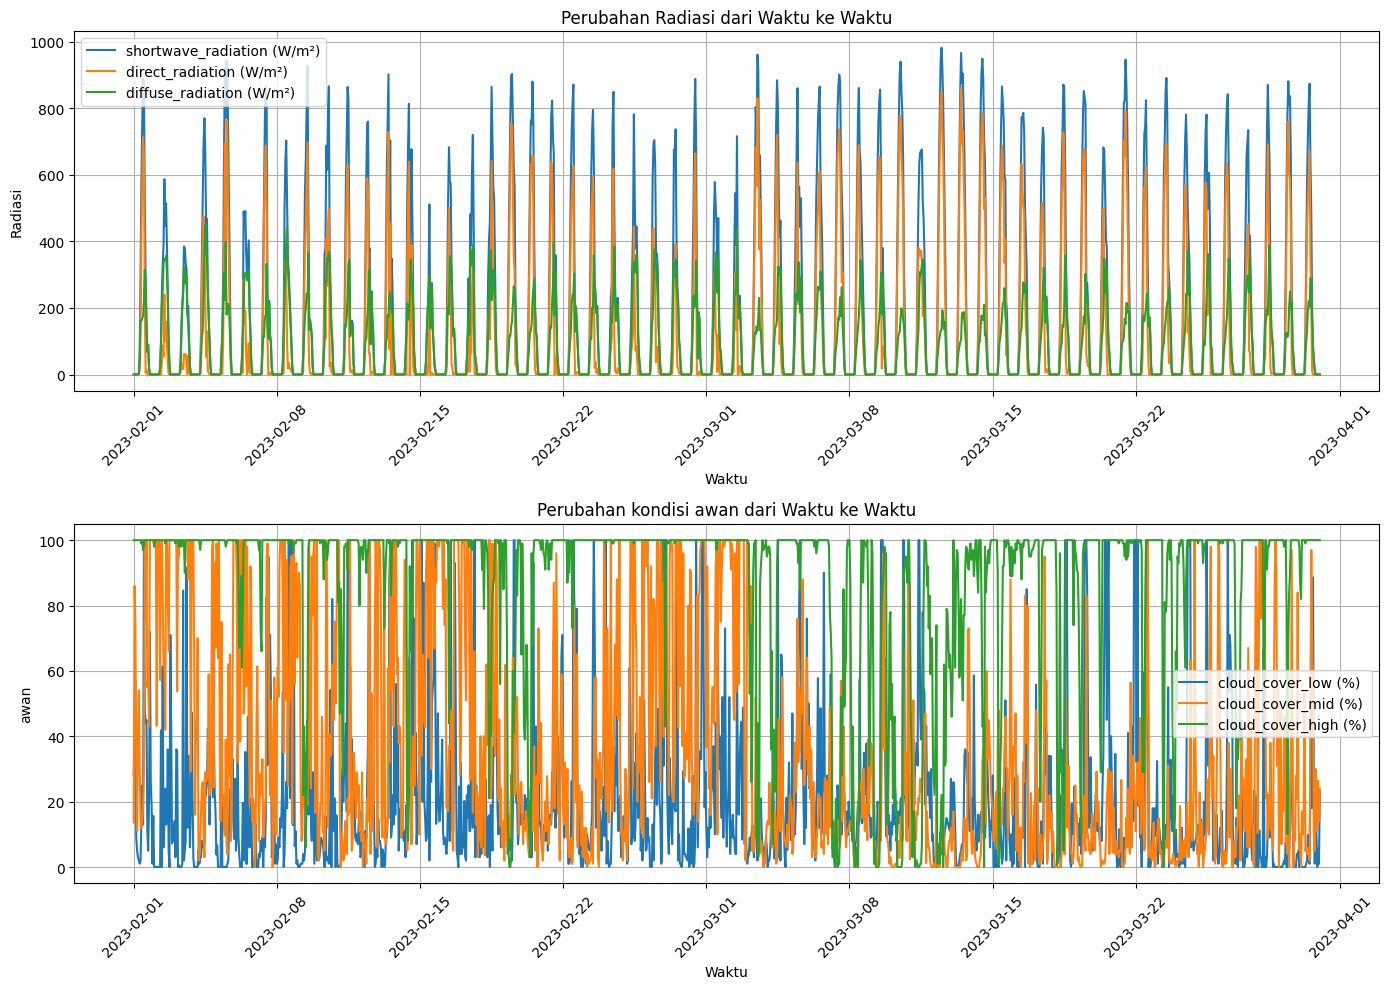

In [ ]:
import matplotlib.pyplot as plt

radiation_features = [
    'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)'
]

# List fitur kelembapan tanah yang ingin divisualisasikan
cloud_features = [
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)'
]

# Buat figure dengan dua subplot (1x2 grid)
plt.figure(figsize=(14, 10))

# Subplot 1: Radiasi
plt.subplot(2, 1, 1)
for feature in radiation_features:
    plt.plot(df_2023['timestamp'], df_2023[feature], label=feature)
plt.title('Perubahan Radiasi dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Radiasi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Subplot 2: Kondisi Awan
plt.subplot(2, 1, 2)
for feature in cloud_features:
    plt.plot(df_2023['timestamp'], df_2023[feature], label=feature)
plt.title('Perubahan kondisi awan dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('awan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Mengatur tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()

Pada saat curah hujan yang tinggi awan semakin tebal sehingga radiasi matahari tidak begitu sampai ke permukaan.

# PREPROCESSING DAN MODELLING
Disini akan dibahas codingan dari import library yang dibutuhkan hingga modelling

In [ ]:
""" SETELAH RESTART, Start dari sini runnya"""
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
!pip install autogluon
""" MOHON UNTUK RESTART NOTEBOOK SETELAH INSTALL AUTOGLUON DAN RUN LAGI
DARI IMPORT LIBRARY DIATAS  """

' MOHON UNTUK RESTART NOTEBOOK SETELAH INSTALL AUTOGLUON DAN RUN LAGI\nDARI IMPORT LIBRARY DIATAS  '

Setelah install autogluon mohon di restart dan run dari import librarti diatas

In [ ]:
def clean_and_read_csv(file_path):
    # Read all lines from the file
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        lines = file.readlines()

    # Split the first line to get headers
    headers = lines[0].strip().split(';')

    # Initialize a list to store data rows
    data = []

    # Process each subsequent line
    for line in lines[1:]:
        # Split the line by ';' to get each value
        row = line.strip().split(';')

        # Check if the row length matches headers; if not, pad with NaN
        if len(row) < len(headers):
            row.extend([np.nan] * (len(headers) - len(row)))
        elif len(row) > len(headers):
            row = row[:len(headers)]  # Truncate if row has more values than headers

        # Append the cleaned row to the data list
        data.append(row)

    # Create a DataFrame with headers
    df = pd.DataFrame(data, columns=headers)

    return df

# Read and clean the CSV files
train = clean_and_read_csv('/kaggle/input/smsdsc/Train Set.csv')
test = clean_and_read_csv('/kaggle/input/smsdsc/Test Set.csv')
submission = clean_and_read_csv('/kaggle/input/smsdsc/Submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   ID                                     17520 non-null  object
 1   time                                   17520 non-null  object
 2   temperature_2m (EEC)                 17520 non-null  object
 3   relative_humidity_2m (%)               17520 non-null  object
 4   dew_point_2m (EEC)                   17520 non-null  object
 5   apparent_temperature (EEC)           17520 non-null  object
 6   precipitation (mm)                     17520 non-null  object
 7   pressure_msl (hPa)                     17520 non-null  object
 8   surface_pressure (hPa)                 17520 non-null  object
 9   cloud_cover (%)                        17520 non-null  object
 10  cloud_cover_low (%)                    17520 non-null  object
 11  cloud_cover_mid

In [ ]:
train

,ID,time,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),precipitation (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),...,soil_moisture_100_to_255cm (m?/m?),shortwave_radiation (W/m?),direct_radiation (W/m?),diffuse_radiation (W/m?),direct_normal_irradiance (W/m?),global_tilted_irradiance (W/m?),terrestrial_radiation (W/m?),is_day (),sunshine_duration (s),electricity_shutdown
0,1,2022-01-01T00:00,#N/A,91,"20,7","25,7","0,1","1011,4","987,2",52,...,"0,323",0,0,0,0,0,0,0,0,0
1,2,2022-01-01T01:00,"22,2",89,"20,3","25,5",0,"1010,9","986,7",#N/A,...,"0,323",0,0,0,0,0,0,0,0,0
2,3,2022-01-01T02:00,#N/A,87,"20,2","25,4",0,1010,"985,8",42,...,"0,323",0,0,0,0,0,0,0,0,0
3,4,2022-01-01T03:00,"22,5",86,"20,1","25,1",0,1010,"985,8",43,...,"0,323",0,0,0,0,0,0,0,0,0
4,5,2022-01-01T04:00,"22,7",84,"19,9","25,6",0,"1009,8","985,7",#N/A,...,"0,323",0,0,0,0,0,#N/A,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17516,2023-12-31T19:00,"24,7",93,"23,5",30,#N/A,"1011,5","987,5",59,...,"0,206",0,0,0,0,0,0,0,0,0
17516,17517,2023-12-31T20:00,#N/A,94,"23,8","30,5","2,2","1011,9","987,9",#N/A,...,"0,206",0,0,0,0,0,0,0,0,0
17517,17518,2023-12-31T21:00,#N/A,#N/A,"23,4","29,4",#N/A,"1012,6","988,5",78,...,"0,206",0,0,0,0,0,0,0,0,0
17518,17519,2023-12-31T22:00,#N/A,93,"22,9",29,"1,8",1012,"987,9",44,...,"0,206",0,0,0,0,0,0,0,#N/A,0


Karena ada nilai #N/A dalam bentuk string, oleh karena itu harus diubah ke NaN

In [ ]:
def replace_na_with_nan(df):
    # Replace '#N/A' values with np.nan
    df = df.replace('#N/A', np.nan)
    return df

In [ ]:
# Replace '#N/A' with np.nan in the DataFrames
train = replace_na_with_nan(train)
test = replace_na_with_nan(test)
submission = replace_na_with_nan(submission)

karena banyak kolom yang bertipe object karena ada tanda ','
oleh karena itu diganti dengan tanda '.' dan di convert ke numeric

In [ ]:
# Mengganti koma dengan titik di semua kolom kecuali 'ID' dan 'time'
for col in train.columns:
    if col not in ['ID', 'time']:
        train[col] = train[col].str.replace(',', '.')

# Mengonversi tipe data ke float untuk semua kolom kecuali 'ID' dan 'time'
for col in train.columns:
    if col not in ['ID', 'time']:
        train[col] = pd.to_numeric(train[col], errors='coerce')


In [ ]:
# Mengganti koma dengan titik di semua kolom kecuali 'ID' dan 'time'
for col in test.columns:
    if col not in ['ID', 'time']:
        test[col] = test[col].str.replace(',', '.')

# Mengonversi tipe data ke float untuk semua kolom kecuali 'ID' dan 'time'
for col in test.columns:
    if col not in ['ID', 'time']:
        test[col] = pd.to_numeric(test[col], errors='coerce')


In [ ]:
print(train.isna().sum())

ID                                          0
time                                        0
temperature_2m (EEC)                   8021
relative_humidity_2m (%)                 1759
dew_point_2m (EEC)                        0
apparent_temperature (EEC)                0
precipitation (mm)                       3542
pressure_msl (hPa)                          0
surface_pressure (hPa)                   1814
cloud_cover (%)                          4351
cloud_cover_low (%)                      3541
cloud_cover_mid (%)                      2624
cloud_cover_high (%)                        0
vapour_pressure_deficit (kPa)            1784
wind_speed_10m (km/h)                    3492
wind_speed_100m (km/h)                      0
wind_direction_10m (EE)                1699
wind_direction_100m (EE)               1796
wind_gusts_10m (km/h)                    2604
soil_temperature_0_to_7cm (EEC)           0
soil_temperature_7_to_28cm (EEC)          0
soil_temperature_28_to_100cm (EE

In [ ]:
train.columns

Index(['ID', 'time', 'temperature_2m (EEC)', 'relative_humidity_2m (%)',
       'dew_point_2m (EEC)', 'apparent_temperature (EEC)',
       'precipitation (mm)', 'pressure_msl (hPa)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)',
       'cloud_cover_high (%)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (EE)', 'wind_direction_100m (EE)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (EEC)',
       'soil_temperature_7_to_28cm (EEC)',
       'soil_temperature_28_to_100cm (EEC)',
       'soil_temperature_100_to_255cm (EEC)',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'diffuse_radiation (W/m?)',
       'direct_normal_irradiance (W/m?)', 'global_tilted_ir

menyimpan label electricity_shutdown dan precipitation (mm), serta menggabung train dan test agar memudahkan dalam preprocessing

In [ ]:
train_label_bin = train['electricity_shutdown']
train_label_reg = train['precipitation (mm)']
id_train = train['ID']
id_test = test['ID']
train.drop(['electricity_shutdown', 'precipitation (mm)'], axis=1, inplace=True)

In [ ]:
df_merge = pd.concat([train, test], axis=0).reset_index(drop=True)
df_merge

,ID,time,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),...,soil_moisture_28_to_100cm (m?/m?),soil_moisture_100_to_255cm (m?/m?),shortwave_radiation (W/m?),direct_radiation (W/m?),diffuse_radiation (W/m?),direct_normal_irradiance (W/m?),global_tilted_irradiance (W/m?),terrestrial_radiation (W/m?),is_day (),sunshine_duration (s)
0,1,2022-01-01T00:00,NaN,91.0,20.7,25.7,1011.4,987.2,52.0,3.0,...,0.269,0.323,0,0,0,0.0,0,0.0,0,0.0
1,2,2022-01-01T01:00,22.2,89.0,20.3,25.5,1010.9,986.7,NaN,NaN,...,0.269,0.323,0,0,0,0.0,0,0.0,0,0.0
2,3,2022-01-01T02:00,NaN,87.0,20.2,25.4,1010.0,985.8,42.0,7.0,...,0.269,0.323,0,0,0,0.0,0,0.0,0,0.0
3,4,2022-01-01T03:00,22.5,86.0,20.1,25.1,1010.0,985.8,43.0,8.0,...,0.268,0.323,0,0,0,0.0,0,0.0,0,0.0
4,5,2022-01-01T04:00,22.7,84.0,19.9,25.6,1009.8,985.7,NaN,13.0,...,NaN,0.323,0,0,0,0.0,0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,21884,2024-06-30T19:00,24.4,91.0,22.9,29.1,1011.3,987.3,75.0,NaN,...,NaN,0.271,0,0,0,0.0,0,0.0,0,0.0
21884,21885,2024-06-30T20:00,24.1,93.0,22.9,29.0,1012.1,988.0,76.0,45.0,...,0.181,0.271,0,0,0,0.0,0,0.0,0,0.0
21885,21886,2024-06-30T21:00,24.5,89.0,22.5,29.5,1012.6,988.5,85.0,59.0,...,0.181,0.271,0,0,0,0.0,0,0.0,0,NaN
21886,21887,2024-06-30T22:00,23.2,95.0,22.4,28.0,1012.7,988.5,53.0,31.0,...,0.181,0.271,0,0,0,0.0,0,NaN,0,0.0


Pada cell dibawah ini, dilakukan konversi kolom 'time' pada DataFrame df_merge menjadi format datetime menggunakan pd.to_datetime(). Selanjutnya, fungsi add_time_features() digunakan untuk menambahkan fitur waktu ke dalam DataFrame. Fungsi ini menambahkan fitur tahun, bulan, hari, dan jam dari kolom 'time' yang sudah dikonversi. Selain itu, fitur siklis seperti sinus dan kosinus dari bulan serta hari dalam setahun juga ditambahkan untuk menangkap pola musiman. Fitur-fitur ini bermanfaat untuk model machine learning yang membutuhkan representasi waktu yang lebih komprehensif. Fungsi ini diterapkan ke DataFrame df_merge untuk memperkaya data dengan informasi temporal tambahan.

In [ ]:

# Convert 'date' column to datetime
df_merge['time'] = pd.to_datetime(df_merge['time'])

def add_time_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Menambahkan berbagai fitur waktu ke dalam DataFrame.
    """
    # Membuat fitur waktu dasar
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour

#     # Menambahkan fitur siklis berdasarkan kolom 'time'
    df['time_month_sin'] = np.sin(df['time'].dt.month * (2 * np.pi / 12))
    df['time_month_cos'] = np.cos(df['time'].dt.month * (2 * np.pi / 12))

    df['time_day_year_sin'] = np.sin(df['time'].dt.day_of_year * (2 * np.pi / 366))
    df['time_day_year_cos'] = np.cos(df['time'].dt.day_of_year * (2 * np.pi / 366))

    return df

# Menerapkan fungsi ke DataFrame train dan test
df_merge = add_time_features(df_merge)


In [ ]:
df_merge

,ID,time,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),...,is_day (),sunshine_duration (s),year,month,day,hour,time_month_sin,time_month_cos,time_day_year_sin,time_day_year_cos
0,1,2022-01-01 00:00:00,NaN,91.0,20.7,25.7,1011.4,987.2,52.0,3.0,...,0,0.0,2022,1,1,0,5.000000e-01,0.866025,0.017166,0.999853
1,2,2022-01-01 01:00:00,22.2,89.0,20.3,25.5,1010.9,986.7,NaN,NaN,...,0,0.0,2022,1,1,1,5.000000e-01,0.866025,0.017166,0.999853
2,3,2022-01-01 02:00:00,NaN,87.0,20.2,25.4,1010.0,985.8,42.0,7.0,...,0,0.0,2022,1,1,2,5.000000e-01,0.866025,0.017166,0.999853
3,4,2022-01-01 03:00:00,22.5,86.0,20.1,25.1,1010.0,985.8,43.0,8.0,...,0,0.0,2022,1,1,3,5.000000e-01,0.866025,0.017166,0.999853
4,5,2022-01-01 04:00:00,22.7,84.0,19.9,25.6,1009.8,985.7,NaN,13.0,...,0,0.0,2022,1,1,4,5.000000e-01,0.866025,0.017166,0.999853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,21884,2024-06-30 19:00:00,24.4,91.0,22.9,29.1,1011.3,987.3,75.0,NaN,...,0,0.0,2024,6,30,19,1.224647e-16,-1.000000,0.017166,-0.999853
21884,21885,2024-06-30 20:00:00,24.1,93.0,22.9,29.0,1012.1,988.0,76.0,45.0,...,0,0.0,2024,6,30,20,1.224647e-16,-1.000000,0.017166,-0.999853
21885,21886,2024-06-30 21:00:00,24.5,89.0,22.5,29.5,1012.6,988.5,85.0,59.0,...,0,NaN,2024,6,30,21,1.224647e-16,-1.000000,0.017166,-0.999853
21886,21887,2024-06-30 22:00:00,23.2,95.0,22.4,28.0,1012.7,988.5,53.0,31.0,...,0,0.0,2024,6,30,22,1.224647e-16,-1.000000,0.017166,-0.999853


In [ ]:
col_mean = ['cloud_cover_low (%)', 'wind_speed_10m (km/h)', 'wind_gusts_10m (km/h)', 'surface_pressure (hPa)', 'wind_direction_100m (EE)', 'relative_humidity_2m (%)', 'vapour_pressure_deficit (kPa)']


# Inisialisasi KNNImputer
imputer = KNNImputer(n_neighbors=10)  # Anda bisa menyesuaikan nilai n_neighbors

# Terapkan KNN imputer untuk kolom-kolom yang diinginkan
df_merge[col_mean] = imputer.fit_transform(df_merge[col_mean])

In [ ]:
df_merge.drop('time', axis=1, inplace=True)
df_merge.drop('ID', axis=1, inplace=True)

Pada cell dibawah ini, data pada DataFrame df_merge diskalakan menggunakan MinMaxScaler dari scikit-learn. MinMaxScaler bekerja dengan mengubah nilai-nilai dalam setiap kolom ke dalam rentang antara 0 dan 1, berdasarkan nilai minimum dan maksimum dari masing-masing kolom. Langkah ini penting untuk normalisasi data agar model machine learning dapat belajar lebih efisien dan kinerja model menjadi lebih stabil. Setelah transformasi, DataFrame df_merge diperbarui dengan nilai-nilai yang telah diskalakan, dengan kolom yang sama seperti sebelumnya.

In [ ]:
scaler = MinMaxScaler()
# Terapkan transformasi
df_merge =pd.DataFrame(scaler.fit_transform(df_merge), columns=df_merge.columns)

df_merge

,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),...,is_day (),sunshine_duration (s),year,month,day,hour,time_month_sin,time_month_cos,time_day_year_sin,time_day_year_cos
0,NaN,0.859375,0.567164,0.385650,0.489209,0.466165,0.52,0.030,0.32,1.00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.75,0.933013,0.508583,1.000000
1,0.308989,0.828125,0.537313,0.376682,0.453237,0.428571,NaN,0.158,0.17,1.00,...,0.0,0.0,0.0,0.000000,0.000000,0.043478,0.75,0.933013,0.508583,1.000000
2,NaN,0.796875,0.529851,0.372197,0.388489,0.360902,0.42,0.070,0.10,1.00,...,0.0,0.0,0.0,0.000000,0.000000,0.086957,0.75,0.933013,0.508583,1.000000
3,0.325843,0.781250,0.522388,0.358744,0.388489,0.360902,0.43,0.080,0.09,1.00,...,0.0,0.0,0.0,0.000000,0.000000,0.130435,0.75,0.933013,0.508583,1.000000
4,0.337079,0.750000,0.507463,0.381166,0.374101,0.353383,NaN,0.130,0.10,1.00,...,0.0,0.0,0.0,0.000000,0.000000,0.173913,0.75,0.933013,0.508583,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,0.432584,0.859375,0.731343,0.538117,0.482014,0.473684,0.75,0.221,0.03,1.00,...,0.0,0.0,1.0,0.454545,0.966667,0.826087,0.50,0.000000,0.508583,0.000074
21884,0.415730,0.890625,0.731343,0.533632,0.539568,0.526316,0.76,0.450,0.10,1.00,...,0.0,0.0,1.0,0.454545,0.966667,0.869565,0.50,0.000000,0.508583,0.000074
21885,0.438202,0.828125,0.701493,0.556054,0.575540,0.563910,0.85,0.590,0.07,0.93,...,0.0,NaN,1.0,0.454545,0.966667,0.913043,0.50,0.000000,0.508583,0.000074
21886,0.365169,0.921875,0.694030,0.488789,0.582734,0.563910,0.53,0.310,0.06,0.71,...,0.0,0.0,1.0,0.454545,0.966667,0.956522,0.50,0.000000,0.508583,0.000074


In [ ]:
df_merge.isnull().sum()

,0
temperature_2m (EEC),9988
relative_humidity_2m (%),0
dew_point_2m (EEC),0
apparent_temperature (EEC),0
pressure_msl (hPa),0
surface_pressure (hPa),0
cloud_cover (%),5461
cloud_cover_low (%),0
cloud_cover_mid (%),3250
cloud_cover_high (%),0


Berdasarkan hasil pemeriksaan nilai null pada DataFrame `df_merge`, terdapat beberapa kolom yang memiliki nilai null atau kosong, seperti `temperature_2m`, `cloud_cover`, `cloud_cover_mid`, `wind_direction_10m`, `soil_moisture_28_to_100cm`, `terrestrial_radiation`, dan `sunshine_duration`. Untuk mengatasi masalah ini, kita akan menggunakan model AutoGluon untuk memprediksi nilai-nilai yang kosong dengan memanfaatkan informasi dari kolom lain yang tidak memiliki nilai kosong. Dengan pendekatan ini, kita dapat mengisi nilai null secara cerdas berdasarkan pola yang ditemukan dalam data, sehingga meningkatkan kualitas data dan performa model machine learning yang akan dibangun nantinya.

Setiap kolom yang memiliki nilai null akan diprediksi oleh AutoGluon dengan estimasi waktu sekitar 15 menit per kolom, sehingga total waktu untuk preprocessing dan mengisi semua nilai null ini adalah sekitar 105 menit atau sekitar 2 jam. Dengan pendekatan ini, kita dapat mengisi nilai null secara cerdas berdasarkan pola yang ditemukan dalam data, sehingga meningkatkan kualitas data dan performa model machine learning yang akan dibangun nantinya.

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'temperature_2m (EEC)'
other_features = [col for col in df_merge.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_merge[df_merge[feature_with_nans].isna()]
df_without_nan = df_merge.dropna(subset=[feature_with_nans])

predictor_temper = TabularPredictor(label='temperature_2m (EEC)',
                                   eval_metric='root_mean_squared_error')

predictor_temper.fit(
   df_without_nan, time_limit=3600 * 0.5
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_065632"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.01 GB / 12.67 GB (86.9%)
Disk Space Avail:   65.31 GB / 107.72 GB (60.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 0.00937967
[2000]	valid_set's rmse: 0.00876608
[3000]	valid_set's rmse: 0.00857716
[4000]	valid_set's rmse: 0.00849085
[5000]	valid_set's rmse: 0.00844719
[6000]	valid_set's rmse: 0.00842523
[7000]	valid_set's rmse: 0.00841331
[8000]	valid_set's rmse: 0.00840176
[9000]	valid_set's rmse: 0.0083921
[10000]	valid_set's rmse: 0.00838738


	-0.0084	 = Validation score   (-root_mean_squared_error)
	40.79s	 = Training   runtime
	3.1s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1750.02s of the 1750.02s of remaining time.


[1000]	valid_set's rmse: 0.0071708
[2000]	valid_set's rmse: 0.00706694
[3000]	valid_set's rmse: 0.00704172
[4000]	valid_set's rmse: 0.00704249


	-0.007	 = Validation score   (-root_mean_squared_error)
	23.04s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1725.93s of the 1725.93s of remaining time.
	-0.01	 = Validation score   (-root_mean_squared_error)
	68.48s	 = Training   runtime
	0.33s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 1655.99s of the 1655.99s of remaining time.
	-0.0064	 = Validation score   (-root_mean_squared_error)
	264.64s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 1391.19s of the 1391.19s of remaining time.
	-0.0099	 = Validation score   (-root_mean_squared_error)
	20.84s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 1369.16s of the 1369.16s of remaining time.
	-0.0065	 = Validation score   (-root_mean_squared_error)
	20.51s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting mod

[1000]	valid_set's rmse: 0.00743663
[2000]	valid_set's rmse: 0.00741872
[3000]	valid_set's rmse: 0.00741613
[4000]	valid_set's rmse: 0.00741575
[5000]	valid_set's rmse: 0.00741566
[6000]	valid_set's rmse: 0.00741565
[7000]	valid_set's rmse: 0.00741565
[8000]	valid_set's rmse: 0.00741565
[9000]	valid_set's rmse: 0.00741565
[10000]	valid_set's rmse: 0.00741565


	-0.0074	 = Validation score   (-root_mean_squared_error)
	163.57s	 = Training   runtime
	9.64s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 1131.51s of remaining time.
	Ensemble Weights: {'CatBoost': 0.444, 'NeuralNetFastAI': 0.444, 'LightGBM': 0.111}
	-0.0058	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 668.62s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1959.6 rows/s (1190 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240914_065632")


In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_temper.predict(X_test)

# Isi nilai kosong dengan prediksi
df_merge.loc[df_merge[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_merge.head())

   temperature_2m (EEC)  relative_humidity_2m (%)  dew_point_2m (EEC)  \
0                0.318403                  0.859375              0.567164   
1                0.308989                  0.828125              0.537313   
2                0.329902                  0.796875              0.529851   
3                0.325843                  0.781250              0.522388   
4                0.337079                  0.750000              0.507463   

   apparent_temperature (EEC)  pressure_msl (hPa)  surface_pressure (hPa)  \
0                      0.385650            0.489209                0.466165   
1                      0.376682            0.453237                0.428571   
2                      0.372197            0.388489                0.360902   
3                      0.358744            0.388489                0.360902   
4                      0.381166            0.374101                0.353383   

   cloud_cover (%)  cloud_cover_low (%)  cloud_cover_mid (%)  

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'sunshine_duration (s)'
other_features = [col for col in df_merge.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_merge[df_merge[feature_with_nans].isna()]
df_without_nan = df_merge.dropna(subset=[feature_with_nans])

# Pisahkan fitur dan target
X_train = df_without_nan[other_features]
y_train = df_without_nan[feature_with_nans]

predictor_sunshine= TabularPredictor(label='sunshine_duration (s)',
                                    problem_type='regression',
                             eval_metric='root_mean_squared_error')

predictor_sunshine.fit(
   df_without_nan, time_limit=3600 * 0.5
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_070746"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.32 GB / 12.67 GB (81.4%)
Disk Space Avail:   64.79 GB / 107.72 GB (60.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 0.0158946
[2000]	valid_set's rmse: 0.0150498
[3000]	valid_set's rmse: 0.0148205
[4000]	valid_set's rmse: 0.0147137
[5000]	valid_set's rmse: 0.0146577
[6000]	valid_set's rmse: 0.0146292
[7000]	valid_set's rmse: 0.0146151
[8000]	valid_set's rmse: 0.0146069
[9000]	valid_set's rmse: 0.014603
[10000]	valid_set's rmse: 0.0146


	-0.0146	 = Validation score   (-root_mean_squared_error)
	44.81s	 = Training   runtime
	6.72s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1744.99s of the 1744.99s of remaining time.
	-0.0054	 = Validation score   (-root_mean_squared_error)
	4.22s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1740.66s of the 1740.65s of remaining time.
	-0.0029	 = Validation score   (-root_mean_squared_error)
	54.77s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 1685.68s of the 1685.67s of remaining time.
	-0.0055	 = Validation score   (-root_mean_squared_error)
	303.86s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 1381.72s of the 1381.72s of remaining time.
	-0.0031	 = Validation score   (-root_mean_squared_error)
	9.61s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: N

In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_sunshine.predict(X_test)

# Isi nilai kosong dengan prediksi
df_merge.loc[df_merge[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_merge.head())

   temperature_2m (EEC)  relative_humidity_2m (%)  dew_point_2m (EEC)  \
0                0.318403                  0.859375              0.567164   
1                0.308989                  0.828125              0.537313   
2                0.329902                  0.796875              0.529851   
3                0.325843                  0.781250              0.522388   
4                0.337079                  0.750000              0.507463   

   apparent_temperature (EEC)  pressure_msl (hPa)  surface_pressure (hPa)  \
0                      0.385650            0.489209                0.466165   
1                      0.376682            0.453237                0.428571   
2                      0.372197            0.388489                0.360902   
3                      0.358744            0.388489                0.360902   
4                      0.381166            0.374101                0.353383   

   cloud_cover (%)  cloud_cover_low (%)  cloud_cover_mid (%)  

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'wind_direction_10m (EE)'
other_features = [col for col in df_merge.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_merge[df_merge[feature_with_nans].isna()]
df_without_nan = df_merge.dropna(subset=[feature_with_nans])

predictor_wind10m= TabularPredictor(label='wind_direction_10m (EE)',
                                   problem_type='regression',
                             eval_metric='root_mean_squared_error')

predictor_wind10m.fit(
   df_without_nan, time_limit=3600 * 0.5
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_071805"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.12 GB / 12.67 GB (79.8%)
Disk Space Avail:   64.66 GB / 107.72 GB (60.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 0.163918
[2000]	valid_set's rmse: 0.163189


	-0.163	 = Validation score   (-root_mean_squared_error)
	12.0s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1785.87s of the 1785.87s of remaining time.


[1000]	valid_set's rmse: 0.15913
[2000]	valid_set's rmse: 0.158817


	-0.1588	 = Validation score   (-root_mean_squared_error)
	15.1s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1770.11s of the 1770.1s of remaining time.
	-0.1655	 = Validation score   (-root_mean_squared_error)
	176.68s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 1584.81s of the 1584.8s of remaining time.
	-0.1594	 = Validation score   (-root_mean_squared_error)
	187.72s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 1397.03s of the 1397.03s of remaining time.
	-0.1633	 = Validation score   (-root_mean_squared_error)
	45.63s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 1344.92s of the 1344.91s of remaining time.
	-0.1665	 = Validation score   (-root_mean_squared_error)
	31.19s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting m

[1000]	valid_set's rmse: 0.1631


	-0.1631	 = Validation score   (-root_mean_squared_error)
	24.97s	 = Training   runtime
	0.66s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 1228.28s of remaining time.
	Ensemble Weights: {'XGBoost': 0.353, 'LightGBM': 0.294, 'KNeighborsDist': 0.118, 'CatBoost': 0.118, 'NeuralNetFastAI': 0.118}
	-0.1552	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 571.84s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1633.9 rows/s (1975 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240914_071805")


In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_wind10m.predict(X_test)

# Isi nilai kosong dengan prediksi
df_merge.loc[df_merge[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_merge.head())

   temperature_2m (EEC)  relative_humidity_2m (%)  dew_point_2m (EEC)  \
0                0.318403                  0.859375              0.567164   
1                0.308989                  0.828125              0.537313   
2                0.329902                  0.796875              0.529851   
3                0.325843                  0.781250              0.522388   
4                0.337079                  0.750000              0.507463   

   apparent_temperature (EEC)  pressure_msl (hPa)  surface_pressure (hPa)  \
0                      0.385650            0.489209                0.466165   
1                      0.376682            0.453237                0.428571   
2                      0.372197            0.388489                0.360902   
3                      0.358744            0.388489                0.360902   
4                      0.381166            0.374101                0.353383   

   cloud_cover (%)  cloud_cover_low (%)  cloud_cover_mid (%)  

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'terrestrial_radiation (W/m?)'
other_features = [col for col in df_merge.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_merge[df_merge[feature_with_nans].isna()]
df_without_nan = df_merge.dropna(subset=[feature_with_nans])

predictor_terestialrad= TabularPredictor(label='terrestrial_radiation (W/m?)',
                                        problem_type='regression',
                             eval_metric='root_mean_squared_error')

predictor_terestialrad.fit(
   df_without_nan
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_072739"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.05 GB / 12.67 GB (79.3%)
Disk Space Avail:   63.85 GB / 107.72 GB (59.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 0.0177559
[2000]	valid_set's rmse: 0.0159378
[3000]	valid_set's rmse: 0.0153947
[4000]	valid_set's rmse: 0.0151797
[5000]	valid_set's rmse: 0.0150381
[6000]	valid_set's rmse: 0.0149596
[7000]	valid_set's rmse: 0.0149085
[8000]	valid_set's rmse: 0.0148758
[9000]	valid_set's rmse: 0.0148561
[10000]	valid_set's rmse: 0.0148406


	-0.0148	 = Validation score   (-root_mean_squared_error)
	47.38s	 = Training   runtime
	5.65s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.010102
[2000]	valid_set's rmse: 0.00980379
[3000]	valid_set's rmse: 0.0097488
[4000]	valid_set's rmse: 0.00973736
[5000]	valid_set's rmse: 0.00972537
[6000]	valid_set's rmse: 0.00972395
[7000]	valid_set's rmse: 0.00972268
[8000]	valid_set's rmse: 0.0097216
[9000]	valid_set's rmse: 0.00972055
[10000]	valid_set's rmse: 0.00972002


	-0.0097	 = Validation score   (-root_mean_squared_error)
	66.23s	 = Training   runtime
	5.4s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.013	 = Validation score   (-root_mean_squared_error)
	86.4s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0063	 = Validation score   (-root_mean_squared_error)
	306.7s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0131	 = Validation score   (-root_mean_squared_error)
	25.2s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0112	 = Validation score   (-root_mean_squared_error)
	31.34s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0129	 = Validation score   (-root_mean_squared_error)
	11.62s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.016	 = Validation score   (-root_mean_squared_error)
	103.96s	 = Training   runtime
	0.03s	 = Validation ru

[1000]	valid_set's rmse: 0.00866253
[2000]	valid_set's rmse: 0.00865151
[3000]	valid_set's rmse: 0.00864976
[4000]	valid_set's rmse: 0.00864947
[5000]	valid_set's rmse: 0.00864947


	-0.0086	 = Validation score   (-root_mean_squared_error)
	93.44s	 = Training   runtime
	5.65s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.778, 'LightGBMLarge': 0.222}
	-0.0061	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 807.12s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 347.7 rows/s (1977 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240914_072739")


In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_terestialrad.predict(X_test)

# Isi nilai kosong dengan prediksi
df_merge.loc[df_merge[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_merge.head())

   temperature_2m (EEC)  relative_humidity_2m (%)  dew_point_2m (EEC)  \
0                0.318403                  0.859375              0.567164   
1                0.308989                  0.828125              0.537313   
2                0.329902                  0.796875              0.529851   
3                0.325843                  0.781250              0.522388   
4                0.337079                  0.750000              0.507463   

   apparent_temperature (EEC)  pressure_msl (hPa)  surface_pressure (hPa)  \
0                      0.385650            0.489209                0.466165   
1                      0.376682            0.453237                0.428571   
2                      0.372197            0.388489                0.360902   
3                      0.358744            0.388489                0.360902   
4                      0.381166            0.374101                0.353383   

   cloud_cover (%)  cloud_cover_low (%)  cloud_cover_mid (%)  

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'cloud_cover_mid (%)'
other_features = [col for col in df_merge.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_merge[df_merge[feature_with_nans].isna()]
df_without_nan = df_merge.dropna(subset=[feature_with_nans])

predictor_cloudmid= TabularPredictor(label='cloud_cover_mid (%)',
                                    problem_type='regression',
                             eval_metric='root_mean_squared_error')

predictor_cloudmid.fit(
   df_without_nan, time_limit=3600 * 0.5
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_074112"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.08 GB / 12.67 GB (79.5%)
Disk Space Avail:   63.24 GB / 107.72 GB (58.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 0.145596
[2000]	valid_set's rmse: 0.144013
[3000]	valid_set's rmse: 0.143412
[4000]	valid_set's rmse: 0.142905
[5000]	valid_set's rmse: 0.14281
[6000]	valid_set's rmse: 0.142756
[7000]	valid_set's rmse: 0.142664
[8000]	valid_set's rmse: 0.142586
[9000]	valid_set's rmse: 0.142564
[10000]	valid_set's rmse: 0.142536


	-0.1425	 = Validation score   (-root_mean_squared_error)
	45.83s	 = Training   runtime
	6.15s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1744.9s of the 1744.89s of remaining time.


[1000]	valid_set's rmse: 0.142229
[2000]	valid_set's rmse: 0.141887


	-0.1418	 = Validation score   (-root_mean_squared_error)
	13.01s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1731.36s of the 1731.35s of remaining time.
	-0.1504	 = Validation score   (-root_mean_squared_error)
	129.76s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 1593.07s of the 1593.06s of remaining time.
	-0.1409	 = Validation score   (-root_mean_squared_error)
	304.69s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 1288.28s of the 1288.27s of remaining time.
	-0.1497	 = Validation score   (-root_mean_squared_error)
	40.62s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 1240.78s of the 1240.78s of remaining time.
	-0.1575	 = Validation score   (-root_mean_squared_error)
	30.5s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting 

[1000]	valid_set's rmse: 0.141335
[2000]	valid_set's rmse: 0.140918
[3000]	valid_set's rmse: 0.140824
[4000]	valid_set's rmse: 0.140809
[5000]	valid_set's rmse: 0.140806
[6000]	valid_set's rmse: 0.140805
[7000]	valid_set's rmse: 0.140805
[8000]	valid_set's rmse: 0.140804
[9000]	valid_set's rmse: 0.140804
[10000]	valid_set's rmse: 0.140804


	-0.1408	 = Validation score   (-root_mean_squared_error)
	167.23s	 = Training   runtime
	12.76s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 948.63s of remaining time.
	Ensemble Weights: {'CatBoost': 0.261, 'LightGBMLarge': 0.261, 'LightGBMXT': 0.174, 'XGBoost': 0.174, 'NeuralNetFastAI': 0.087, 'LightGBM': 0.043}
	-0.1376	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 851.49s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 96.0 rows/s (1864 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240914_074112")


In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_cloudmid.predict(X_test)

# Isi nilai kosong dengan prediksi
df_merge.loc[df_merge[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_merge.head())

   temperature_2m (EEC)  relative_humidity_2m (%)  dew_point_2m (EEC)  \
0                0.318403                  0.859375              0.567164   
1                0.308989                  0.828125              0.537313   
2                0.329902                  0.796875              0.529851   
3                0.325843                  0.781250              0.522388   
4                0.337079                  0.750000              0.507463   

   apparent_temperature (EEC)  pressure_msl (hPa)  surface_pressure (hPa)  \
0                      0.385650            0.489209                0.466165   
1                      0.376682            0.453237                0.428571   
2                      0.372197            0.388489                0.360902   
3                      0.358744            0.388489                0.360902   
4                      0.381166            0.374101                0.353383   

   cloud_cover (%)  cloud_cover_low (%)  cloud_cover_mid (%)  

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'cloud_cover (%)'
other_features = [col for col in df_merge.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_merge[df_merge[feature_with_nans].isna()]
df_without_nan = df_merge.dropna(subset=[feature_with_nans])

# Pisahkan fitur dan target
X_train = df_without_nan[other_features]
y_train = df_without_nan[feature_with_nans]

predictor_cloudcover= TabularPredictor(label=feature_with_nans,
                                      problem_type='regression',
                             eval_metric='root_mean_squared_error')

predictor_cloudcover.fit(
   df_without_nan, time_limit=3600 * 0.5
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_075600"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.02 GB / 12.67 GB (79.1%)
Disk Space Avail:   62.44 GB / 107.72 GB (58.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 0.0817182


	-0.0816	 = Validation score   (-root_mean_squared_error)
	8.97s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1789.48s of the 1789.48s of remaining time.


[1000]	valid_set's rmse: 0.0816682


	-0.0814	 = Validation score   (-root_mean_squared_error)
	12.15s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1776.73s of the 1776.72s of remaining time.
	-0.0865	 = Validation score   (-root_mean_squared_error)
	99.86s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 1670.04s of the 1670.04s of remaining time.
	-0.0811	 = Validation score   (-root_mean_squared_error)
	104.43s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 1565.55s of the 1565.54s of remaining time.
	-0.0855	 = Validation score   (-root_mean_squared_error)
	27.98s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 1530.8s of the 1530.8s of remaining time.
	-0.0829	 = Validation score   (-root_mean_squared_error)
	26.3s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting mo

[1000]	valid_set's rmse: 0.0803602


	-0.0803	 = Validation score   (-root_mean_squared_error)
	22.94s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 1414.25s of remaining time.
	Ensemble Weights: {'LightGBMLarge': 0.36, 'CatBoost': 0.2, 'NeuralNetFastAI': 0.16, 'LightGBM': 0.12, 'KNeighborsDist': 0.04, 'LightGBMXT': 0.04, 'XGBoost': 0.04, 'NeuralNetTorch': 0.04}
	-0.0788	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 385.85s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1195.1 rows/s (1643 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240914_075600")


In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_cloudcover.predict(X_test)

# Isi nilai kosong dengan prediksi
df_merge.loc[df_merge[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_merge.head())

   temperature_2m (EEC)  relative_humidity_2m (%)  dew_point_2m (EEC)  \
0                0.318403                  0.859375              0.567164   
1                0.308989                  0.828125              0.537313   
2                0.329902                  0.796875              0.529851   
3                0.325843                  0.781250              0.522388   
4                0.337079                  0.750000              0.507463   

   apparent_temperature (EEC)  pressure_msl (hPa)  surface_pressure (hPa)  \
0                      0.385650            0.489209                0.466165   
1                      0.376682            0.453237                0.428571   
2                      0.372197            0.388489                0.360902   
3                      0.358744            0.388489                0.360902   
4                      0.381166            0.374101                0.353383   

   cloud_cover (%)  cloud_cover_low (%)  cloud_cover_mid (%)  

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'soil_moisture_28_to_100cm (m?/m?)'
other_features = [col for col in df_merge.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_merge[df_merge[feature_with_nans].isna()]
df_without_nan = df_merge.dropna(subset=[feature_with_nans])

# Pisahkan fitur dan target
X_train = df_without_nan[other_features]
y_train = df_without_nan[feature_with_nans]

predictor_soilm_28_100= TabularPredictor(label=feature_with_nans,
                                        problem_type='regression',
                             eval_metric='root_mean_squared_error')

predictor_soilm_28_100.fit(
   df_without_nan, time_limit=3600 * 0.5
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_081239"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.59 GB / 12.67 GB (83.6%)
Disk Space Avail:   61.50 GB / 107.72 GB (57.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 0.0140507
[2000]	valid_set's rmse: 0.0118393
[3000]	valid_set's rmse: 0.0110418
[4000]	valid_set's rmse: 0.0106505
[5000]	valid_set's rmse: 0.0104118
[6000]	valid_set's rmse: 0.0102471
[7000]	valid_set's rmse: 0.0101323
[8000]	valid_set's rmse: 0.0100497
[9000]	valid_set's rmse: 0.00999842
[10000]	valid_set's rmse: 0.00995642


	-0.01	 = Validation score   (-root_mean_squared_error)
	75.27s	 = Training   runtime
	6.4s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1715.43s of the 1715.43s of remaining time.


[1000]	valid_set's rmse: 0.00970439
[2000]	valid_set's rmse: 0.00879714
[3000]	valid_set's rmse: 0.00860128
[4000]	valid_set's rmse: 0.00850143
[5000]	valid_set's rmse: 0.00846308
[6000]	valid_set's rmse: 0.00843619
[7000]	valid_set's rmse: 0.00842423
[8000]	valid_set's rmse: 0.00841805
[9000]	valid_set's rmse: 0.00841197
[10000]	valid_set's rmse: 0.00840906


	-0.0084	 = Validation score   (-root_mean_squared_error)
	60.59s	 = Training   runtime
	5.05s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1648.47s of the 1648.47s of remaining time.
	-0.0078	 = Validation score   (-root_mean_squared_error)
	115.96s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 1526.38s of the 1526.37s of remaining time.
	-0.0075	 = Validation score   (-root_mean_squared_error)
	312.27s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 1214.01s of the 1214.01s of remaining time.
	-0.0058	 = Validation score   (-root_mean_squared_error)
	27.9s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 1184.9s of the 1184.89s of remaining time.
	-0.0152	 = Validation score   (-root_mean_squared_error)
	35.98s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting 

[1000]	valid_set's rmse: 0.00718905
[2000]	valid_set's rmse: 0.00706593
[3000]	valid_set's rmse: 0.0070437
[4000]	valid_set's rmse: 0.00703788
[5000]	valid_set's rmse: 0.00703664
[6000]	valid_set's rmse: 0.00703639
[7000]	valid_set's rmse: 0.00703628
[8000]	valid_set's rmse: 0.00703625
[9000]	valid_set's rmse: 0.00703623
[10000]	valid_set's rmse: 0.00703623


	-0.007	 = Validation score   (-root_mean_squared_error)
	178.58s	 = Training   runtime
	13.31s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 779.97s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE': 0.643, 'CatBoost': 0.214, 'LightGBMLarge': 0.143}
	-0.0055	 = Validation score   (-root_mean_squared_error)
	0.07s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1020.19s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 144.9 rows/s (1970 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240914_081239")


In [ ]:
df_merge.isnull().sum()

,0
temperature_2m (EEC),0
relative_humidity_2m (%),0
dew_point_2m (EEC),0
apparent_temperature (EEC),0
pressure_msl (hPa),0
surface_pressure (hPa),0
cloud_cover (%),0
cloud_cover_low (%),0
cloud_cover_mid (%),0
cloud_cover_high (%),0


In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_soilm_28_100.predict(X_test)

# Isi nilai kosong dengan prediksi
df_merge.loc[df_merge[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_merge.head())

   temperature_2m (EEC)  relative_humidity_2m (%)  dew_point_2m (EEC)  \
0                0.318403                  0.859375              0.567164   
1                0.308989                  0.828125              0.537313   
2                0.329902                  0.796875              0.529851   
3                0.325843                  0.781250              0.522388   
4                0.337079                  0.750000              0.507463   

   apparent_temperature (EEC)  pressure_msl (hPa)  surface_pressure (hPa)  \
0                      0.385650            0.489209                0.466165   
1                      0.376682            0.453237                0.428571   
2                      0.372197            0.388489                0.360902   
3                      0.358744            0.388489                0.360902   
4                      0.381166            0.374101                0.353383   

   cloud_cover (%)  cloud_cover_low (%)  cloud_cover_mid (%)  


Pada cell dibawah ini, kami menambahkan fitur komponen vektor angin ke dalam dataset `df_merge`. Fitur-fitur ini dihitung melalui fungsi `calculate_wind_components`, yang bertujuan untuk mengkonversi data kecepatan dan arah angin dari representasi polar (arah dan magnitudo) ke dalam representasi kartesian (komponen x dan y). Langkah ini dilakukan untuk kecepatan angin pada ketinggian 10 meter dan 100 meter serta untuk kecepatan hembusan angin pada ketinggian 10 meter.

Fungsi `calculate_wind_components` bekerja dengan cara mengalikan kecepatan angin dengan fungsi trigonometri `cos` dan `sin` dari arah angin (yang dikonversi ke radian), sehingga menghasilkan dua komponen baru: komponen x (`cos`) yang mewakili arah horizontal, dan komponen y (`sin`) yang mewakili arah vertikal. Komponen ini lebih mudah digunakan dalam analisis dan model machine learning karena memberikan pemahaman yang lebih baik tentang arah pergerakan angin secara dua dimensi.

Hasil dari proses ini adalah penambahan enam kolom baru dalam DataFrame `df_merge`, yaitu: `wind_speed_10m_x`, `wind_speed_10m_y`, `wind_speed_100m_x`, `wind_speed_100m_y`, `wind_gusts_10m_x`, dan `wind_gusts_10m_y`. Kolom-kolom ini memungkinkan analisis yang lebih mendalam dan akurat mengenai pola angin, yang dapat meningkatkan performa model dalam prediksi yang terkait dengan data angin.

In [ ]:
import numpy as np
import pandas as pd

# Fungsi untuk menghitung komponen x dan y dari vektor angin
def calculate_wind_components(df):
    # Kecepatan dan arah angin pada 10m
    df['wind_speed_10m_x'] = df['wind_speed_10m (km/h)'] * np.cos(np.radians(df['wind_direction_10m (EE)']))
    df['wind_speed_10m_y'] = df['wind_speed_10m (km/h)'] * np.sin(np.radians(df['wind_direction_10m (EE)']))

    # Kecepatan dan arah angin pada 100m
    df['wind_speed_100m_x'] = df['wind_speed_100m (km/h)'] * np.cos(np.radians(df['wind_direction_100m (EE)']))
    df['wind_speed_100m_y'] = df['wind_speed_100m (km/h)'] * np.sin(np.radians(df['wind_direction_100m (EE)']))

    # Kecepatan hembusan angin pada 10m
    df['wind_gusts_10m_x'] = df['wind_gusts_10m (km/h)'] * np.cos(np.radians(df['wind_direction_10m (EE)']))
    df['wind_gusts_10m_y'] = df['wind_gusts_10m (km/h)'] * np.sin(np.radians(df['wind_direction_10m (EE)']))

    return df

# Hitung komponen angin untuk data train dan test
df_merge = calculate_wind_components(df_merge)


Pada cell dibawah ini, kami menambahkan fitur "rate of change" (ROC) ke dalam dataset `df_merge`. Fitur ROC ini dihitung untuk berbagai variabel lingkungan, termasuk suhu, kelembapan, tekanan, kecepatan angin, dan radiasi. Fungsi `add_rate_of_change` menghitung perubahan nilai antar waktu untuk setiap variabel yang ditentukan dalam daftar `rate_of_change_columns`.

Rate of change diukur sebagai selisih nilai antara setiap baris dan baris sebelumnya untuk setiap variabel yang dipilih. Misalnya, `roc_temperature_2m (°C)` adalah perbedaan antara suhu saat ini dan suhu pada langkah waktu sebelumnya. Ini membantu dalam mengidentifikasi perubahan dinamis dan tren dalam data yang mungkin tidak terlihat hanya dengan nilai absolut.

Dengan menambahkan kolom-kolom baru yang menunjukkan perubahan ini, seperti `roc_temperature_2m (°C)`, `roc_wind_speed_10m (km/h)`, dan seterusnya, dataset menjadi lebih informatif. Fitur-fitur ini dapat memperkaya analisis dan meningkatkan akurasi model dengan memberikan informasi tambahan tentang fluktuasi dan perubahan dalam data dari waktu ke waktu.

In [ ]:
# Fungsi untuk menambahkan rate of change ke DataFrame
def add_rate_of_change(df):
    # Rate of Change untuk berbagai variabel
    rate_of_change_columns = [
        'temperature_2m (EEC)', 'relative_humidity_2m (%)',
       'dew_point_2m (EEC)', 'apparent_temperature (EEC)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (EE)',
       'wind_direction_100m (EE)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (EEC)',
       'soil_temperature_7_to_28cm (EEC)',
       'soil_temperature_28_to_100cm (EEC)',
       'soil_temperature_100_to_255cm (EEC)',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'diffuse_radiation (W/m?)',
       'direct_normal_irradiance (W/m?)', 'global_tilted_irradiance (W/m?)',
       'terrestrial_radiation (W/m?)'
    ]

    for col in rate_of_change_columns:
        # Menghitung rate of change sebagai perubahan antar waktu
        df[f'roc_{col}'] = df[col].diff()
    return df

# Menambahkan rate of change ke train dan test
df_merge = add_rate_of_change(df_merge)

In [ ]:
df_merge

,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),...,roc_soil_moisture_0_to_7cm (m?/m?),roc_soil_moisture_7_to_28cm (m?/m?),roc_soil_moisture_28_to_100cm (m?/m?),roc_soil_moisture_100_to_255cm (m?/m?),roc_shortwave_radiation (W/m?),roc_direct_radiation (W/m?),roc_diffuse_radiation (W/m?),roc_direct_normal_irradiance (W/m?),roc_global_tilted_irradiance (W/m?),roc_terrestrial_radiation (W/m?)
0,0.318403,0.859375,0.567164,0.385650,0.489209,0.466165,0.520000,0.030,0.32,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.308989,0.828125,0.537313,0.376682,0.453237,0.428571,0.538420,0.158,0.17,1.00,...,-0.002915,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.329902,0.796875,0.529851,0.372197,0.388489,0.360902,0.420000,0.070,0.10,1.00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.325843,0.781250,0.522388,0.358744,0.388489,0.360902,0.430000,0.080,0.09,1.00,...,-0.002915,-0.003003,-0.003802,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.337079,0.750000,0.507463,0.381166,0.374101,0.353383,0.465769,0.130,0.10,1.00,...,0.000000,0.000000,0.000519,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,0.432584,0.859375,0.731343,0.538117,0.482014,0.473684,0.750000,0.221,0.03,1.00,...,0.000000,0.000000,0.000543,0.0,-0.008662,-0.001075,-0.016632,-0.011341,-0.008662,-0.047863
21884,0.415730,0.890625,0.731343,0.533632,0.539568,0.526316,0.760000,0.450,0.10,1.00,...,0.017493,0.006006,-0.001031,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21885,0.438202,0.828125,0.701493,0.556054,0.575540,0.563910,0.850000,0.590,0.07,0.93,...,-0.002915,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21886,0.365169,0.921875,0.694030,0.488789,0.582734,0.563910,0.530000,0.310,0.06,0.71,...,-0.002915,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000371


Pada cell dibawah ini, kita menambahkan fitur "lag" ke dalam dataset df_merge untuk meningkatkan kemampuan model dalam menangkap pola temporal dan hubungan antar waktu. Fitur lag menunjukkan nilai variabel tertentu pada waktu-waktu sebelumnya, yang berguna untuk analisis deret waktu dan prediksi berbasis waktu.

Fungsi create_lag_features digunakan untuk menambahkan fitur lag ke dataset. Fungsi ini mengambil dua argumen utama: daftar kolom yang akan diberikan fitur lag (columns_to_lag) dan daftar langkah waktu yang menunjukkan berapa banyak langkah sebelumnya yang ingin dihitung (lag_steps).

Sebagai contoh, untuk kolom temperature_2m (°C) dan langkah waktu 1, 2, 3, 4, dan 5, fungsi ini akan menghasilkan kolom baru seperti temperature_2m (°C)_lag_1, temperature_2m (°C)_lag_2, dan seterusnya. Setiap kolom lag berisi nilai dari kolom yang sama pada langkah waktu yang ditentukan sebelumnya.

Dengan menambahkan fitur lag ini, dataset menjadi lebih kaya akan informasi temporal, memungkinkan model untuk memahami bagaimana nilai-nilai masa lalu mempengaruhi nilai saat ini. Ini dapat meningkatkan akurasi dan performa model prediksi dengan memberikan konteks waktu tambahan dalam analisis.

In [ ]:
import pandas as pd

# Membuat fungsi untuk menambahkan lag features
def create_lag_features(df, columns, lags):
    for col in columns:
        for lag in lags:
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return df

# Misalkan kolom-kolom yang akan ditambahkan lag features
columns_to_lag = [
    'temperature_2m (EEC)', 'relative_humidity_2m (%)',
       'dew_point_2m (EEC)', 'apparent_temperature (EEC)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (EE)',
       'wind_direction_100m (EE)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (EEC)',
       'soil_temperature_7_to_28cm (EEC)',
       'soil_temperature_28_to_100cm (EEC)',
       'soil_temperature_100_to_255cm (EEC)',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'diffuse_radiation (W/m?)',
       'direct_normal_irradiance (W/m?)', 'global_tilted_irradiance (W/m?)',
       'terrestrial_radiation (W/m?)'
    # Tambahkan kolom lain sesuai kebutuhan
]

# Daftar jumlah lag yang ingin dibuat (misalnya 1, 2, 3 jam sebelumnya)
lag_steps = [1, 2, 3, 4, 5]

# Membuat lag features pada data train
df_merge = create_lag_features(df_merge, columns_to_lag, lag_steps)


<ipython-input-44-1d12886fcb25>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
<ipython-input-44-1d12886fcb25>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
<ipython-input-44-1d12886fcb25>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [ ]:
df_merge

,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),...,global_tilted_irradiance (W/m?)_lag_1,global_tilted_irradiance (W/m?)_lag_2,global_tilted_irradiance (W/m?)_lag_3,global_tilted_irradiance (W/m?)_lag_4,global_tilted_irradiance (W/m?)_lag_5,terrestrial_radiation (W/m?)_lag_1,terrestrial_radiation (W/m?)_lag_2,terrestrial_radiation (W/m?)_lag_3,terrestrial_radiation (W/m?)_lag_4,terrestrial_radiation (W/m?)_lag_5
0,0.318403,0.859375,0.567164,0.385650,0.489209,0.466165,0.520000,0.030,0.32,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.308989,0.828125,0.537313,0.376682,0.453237,0.428571,0.538420,0.158,0.17,1.00,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2,0.329902,0.796875,0.529851,0.372197,0.388489,0.360902,0.420000,0.070,0.10,1.00,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
3,0.325843,0.781250,0.522388,0.358744,0.388489,0.360902,0.430000,0.080,0.09,1.00,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
4,0.337079,0.750000,0.507463,0.381166,0.374101,0.353383,0.465769,0.130,0.10,1.00,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,0.432584,0.859375,0.731343,0.538117,0.482014,0.473684,0.750000,0.221,0.03,1.00,...,0.008662,0.104909,0.325313,0.497594,0.666025,0.047863,0.218626,0.424030,0.594608,0.722555
21884,0.415730,0.890625,0.731343,0.533632,0.539568,0.526316,0.760000,0.450,0.10,1.00,...,0.000000,0.008662,0.104909,0.325313,0.497594,0.000000,0.047863,0.218626,0.424030,0.594608
21885,0.438202,0.828125,0.701493,0.556054,0.575540,0.563910,0.850000,0.590,0.07,0.93,...,0.000000,0.000000,0.008662,0.104909,0.325313,0.000000,0.000000,0.047863,0.218626,0.424030
21886,0.365169,0.921875,0.694030,0.488789,0.582734,0.563910,0.530000,0.310,0.06,0.71,...,0.000000,0.000000,0.000000,0.008662,0.104909,0.000000,0.000000,0.000000,0.047863,0.218626


In [ ]:
df_train_prepro = df_merge[:len(train)].copy().reset_index(drop=True)
df_test_clean = df_merge[len(train):].copy().reset_index(drop=True)

In [ ]:
df_train_prepro_before_fill_precipitation = pd.concat([df_train_prepro, train_label_bin, train_label_reg], axis=1)
df_train_prepro_before_fill_precipitation

,temperature_2m (EEC),relative_humidity_2m (%),dew_point_2m (EEC),apparent_temperature (EEC),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),...,global_tilted_irradiance (W/m?)_lag_3,global_tilted_irradiance (W/m?)_lag_4,global_tilted_irradiance (W/m?)_lag_5,terrestrial_radiation (W/m?)_lag_1,terrestrial_radiation (W/m?)_lag_2,terrestrial_radiation (W/m?)_lag_3,terrestrial_radiation (W/m?)_lag_4,terrestrial_radiation (W/m?)_lag_5,electricity_shutdown,precipitation (mm)
0,0.318403,0.859375,0.567164,0.385650,0.489209,0.466165,0.520000,0.030,0.320000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.1
1,0.308989,0.828125,0.537313,0.376682,0.453237,0.428571,0.538420,0.158,0.170000,1.0,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,0.0
2,0.329902,0.796875,0.529851,0.372197,0.388489,0.360902,0.420000,0.070,0.100000,1.0,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.0,0.0
3,0.325843,0.781250,0.522388,0.358744,0.388489,0.360902,0.430000,0.080,0.090000,1.0,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0
4,0.337079,0.750000,0.507463,0.381166,0.374101,0.353383,0.465769,0.130,0.100000,1.0,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.449438,0.890625,0.776119,0.578475,0.496403,0.488722,0.590000,0.240,0.130000,1.0,...,0.205967,0.189605,0.279115,0.102862,0.337058,0.555684,0.740143,0.877820,0.0,NaN
17516,0.454866,0.906250,0.798507,0.600897,0.525180,0.518797,0.926488,0.586,0.248261,1.0,...,0.127045,0.205967,0.189605,0.000000,0.102862,0.337058,0.555684,0.740143,0.0,2.2
17517,0.433008,0.884375,0.768657,0.551570,0.575540,0.563910,0.780000,0.330,0.173761,1.0,...,0.024062,0.127045,0.205967,0.000000,0.000000,0.102862,0.337058,0.555684,0.0,NaN
17518,0.419123,0.890625,0.731343,0.533632,0.532374,0.518797,0.440000,0.120,0.050000,1.0,...,0.000000,0.024062,0.127045,0.000000,0.000000,0.000000,0.102862,0.337058,0.0,1.8


In [ ]:
df_test_clean.to_csv('df_test_clean.csv', index=False)

In [ ]:
df_train_prepro_before_fill_precipitation.to_csv('df_train_prepro_before_fill_precipitation.csv', index=False)

### Sekarang tahap selanjutnya adalah mengisi nilai kosong kolom `precipitation` pada data train (`df_train_prepro_before_fill_precipitation`) menggunakan autogluon kembali

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
# Misalkan fitur yang ingin diisi adalah 'feature_with_nans'
feature_with_nans = 'precipitation (mm)'
other_features = [col for col in df_train_prepro_before_fill_precipitation.columns if col != feature_with_nans]

# Pisahkan baris dengan dan tanpa nilai kosong pada fitur yang ingin diprediksi
df_with_nan = df_train_prepro_before_fill_precipitation[df_train_prepro_before_fill_precipitation[feature_with_nans].isna()]
df_without_nan = df_train_prepro_before_fill_precipitation.dropna(subset=[feature_with_nans])

predictor_precipitation_train = TabularPredictor(label=feature_with_nans,
                                          problem_type='regression',
                             eval_metric='root_mean_squared_error')

predictor_precipitation_train.fit(
   df_without_nan,
              excluded_model_types=['FT_TRANSFORMER']
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240914_083234"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.75 GB / 12.67 GB (76.9%)
Disk Space Avail:   60.85 GB / 107.72 GB (56.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

(_ray_fit pid=32911) [1000]	valid_set's rmse: 0.206889
(_ray_fit pid=32911) [2000]	valid_set's rmse: 0.205762 [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=32911) [3000]	valid_set's rmse: 0.205719 [repeated 2x across cluster]


(_ray_fit pid=33822) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=33822) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=33822)  [repeated 4x across cluster]
(_ray_fit pid=33822) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=33822) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=33822)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=32910) [4000]	valid_set's rmse: 0.265492 [repeated 2x across cluster]


(_ray_fit pid=34010) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=34010) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=34010)  [repeated 2x across cluster]
(_ray_fit pid=34010) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=34010) This will raise in a future version.
(_ray_fit pid=34010)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=33822) [1000]	valid_set's rmse: 0.251583
(_ray_fit pid=34010) [1000]	valid_set's rmse: 0.234975
(_ray_fit pid=33822) [2000]	valid_set's rmse: 0.250965


(_ray_fit pid=34458) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=34458) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=34458) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=34458) This will raise in a future version.
(_ray_fit pid=34458)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=34458)  [repeated 2x across cluster]


(_ray_fit pid=34010) [2000]	valid_set's rmse: 0.234375


(_ray_fit pid=34718) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=34718) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=34718) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=34718) This will raise in a future version.
(_ray_fit pid=34718)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=34718)  [repeated 2x across cluster]


(_ray_fit pid=34458) [1000]	valid_set's rmse: 0.477887
(_ray_fit pid=34458) [2000]	valid_set's rmse: 0.476766
(_ray_fit pid=34458) [3000]	valid_set's rmse: 0.476623 [repeated 2x across cluster]
(_ray_fit pid=34718) [2000]	valid_set's rmse: 0.295057
(_ray_fit pid=34458) [4000]	valid_set's rmse: 0.476507
(_ray_fit pid=34718) [3000]	valid_set's rmse: 0.29501


(_ray_fit pid=35518) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=35518) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=35518) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=35518) This will raise in a future version.
(_ray_fit pid=35518)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=35518)  [repeated 2x across cluster]


(_ray_fit pid=34718) [4000]	valid_set's rmse: 0.294954


(_ray_fit pid=35758) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=35758) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=35758) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=35758) This will raise in a future version.
(_ray_fit pid=35758)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=35758)  [repeated 2x across cluster]


(_ray_fit pid=35518) [1000]	valid_set's rmse: 0.327557
(_ray_fit pid=35758) [1000]	valid_set's rmse: 0.314198
(_ray_fit pid=35758) [2000]	valid_set's rmse: 0.313958 [repeated 2x across cluster]


(_dystack pid=32685) 	-0.306	 = Validation score   (-root_mean_squared_error)
(_dystack pid=32685) 	797.54s	 = Training   runtime
(_dystack pid=32685) 	13.94s	 = Validation runtime
(_dystack pid=32685) Fitting model: LightGBM_BAG_L1 ... Training model for up to 363.67s of the 959.01s of remaining time.
(_dystack pid=32685) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=1.87%)
(_ray_fit pid=36361) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=36361) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=36361) 
(_ray_fit pid=36361) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=36361) This will raise in a future version.
(_ray_fit pid=36361) 
(_ray_fit pid=36361)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=36668) /usr/local/lib/python3.10/dist-packages/dask/dataframe/

KeyboardInterrupt: 

In [ ]:
# Buat data uji dari fitur dengan nilai kosong
X_test = df_with_nan[other_features]

# Prediksi nilai untuk fitur yang memiliki nilai kosong
predicted_values = predictor_precipitation_train.predict(X_test)

# Isi nilai kosong dengan prediksi
df_train_prepro_before_fill_precipitation.loc[df_train_prepro_before_fill_precipitation[feature_with_nans].isna(), feature_with_nans] = predicted_values

# Tampilkan hasil
print(df_train_prepro_before_fill_precipitation.head())

In [ ]:
# Menyalin data agar tidak mengubah data asli
train_sudah_clean = df_train_prepro_before_fill_precipitation.copy()
train_sudah_clean.to_csv('train_sudah_clean.csv', index=False)

In [ ]:
test_sudah_clean = df_test_clean.copy()
test_sudah_clean.to_csv('test_sudah_clean.csv', index=False)

## PERHATIAN
## ==================================================================================
## SETELAH PROSES PREPROCESSING TELAH SELESAI, NILAI NULL PADA TRAIN DAN TEST SUDAH TERISI SEMUA KECUALI KOLOM ELECTRICITY YANG SENGAJA TIDAK DIISI NILAI NULLNYA KARENA AKAN DIDROP PADA NANTINYA.
## TOLONG PASTIKAN UNTUK **SAVE `train_sudah_clean` dan `test_sudah_clean`**,

## SELANJUTNYA ADALAH DISCONNECT RUN TIME ATAU RESTART NOTEBOOKNYA DAN SIAPKAN CSV TERBARU YANG SUDAH DI SAVE
## ==================================================================================

In [ ]:
""" SETELAH RESTART, Start dari sini runnya"""
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
!pip install autogluon
""" MOHON UNTUK RESTART NOTEBOOK SETELAH INSTALL AUTOGLUON DAN RUN LAGI
DARI IMPORT LIBRARY DIATAS  """

In [ ]:
# Read and clean the CSV files
train_sudah_clean = pd.read_csv('/kaggle/input/sudah-clean/train_sudah_clean.csv')
test_sudah_clean = pd.read_csv('/kaggle/input/sudah-clean/test_sudah_clean.csv')
# submission = pd.read_csv('/kaggle/input/smsdsc/Submission.csv')

In [ ]:
train_label_bin = train_sudah_clean['electricity_shutdown']
train_label_reg = train_sudah_clean['precipitation (mm)']
train_sudah_clean.drop(['electricity_shutdown'], axis=1, inplace=True)

In [ ]:
test_sudah_clean

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
# Inisialisasi AutoGluon TabularPredictor untuk klasifikasi
predictor_precipitation = TabularPredictor(label='precipitation (mm)',
                             problem_type='regression',
                             eval_metric='root_mean_squared_error')


# Latih model AutoGluon pada df_train_resampled
predictor_precipitation.fit(train_sudah_clean,
              excluded_model_types=['FT_TRANSFORMER'])

In [ ]:
test_sudah_clean['precipitation (mm)'] = predictor_precipitation.predict(test_sudah_clean)

In [ ]:
print(test_sudah_clean['precipitation (mm)'].value_counts())

In [ ]:
test_sudah_clean_after_reg = test_sudah_clean.copy()

In [ ]:
test_sudah_clean_after_reg.to_csv('test_sudah_clean_after_reg.csv', index=False)

## PERHATIAN
## ==================================================================================
## SETELAH PROSES **PREDICT `precipitation (mm)`** TELAH SELESAI,
## TOLONG PASTIKAN UNTUK **SAVE `test_sudah_clean_after_reg`**,
## SELANJUTNYA ADALAH DISCONNECT RUN TIME ATAU RESTART NOTEBOOKNYA DAN SIAPKAN TEST TERBARU YANG SUDAH DI SAVE
## ==================================================================================

In [ ]:
""" SETELAH RESTART, Start dari sini runnya"""
import pandas as pd
import numpy as np

In [ ]:
!pip install autogluon
""" MOHON UNTUK RESTART NOTEBOOK SETELAH INSTALL AUTOGLUON DAN RUN LAGI
DARI IMPORT LIBRARY DIATAS  """

' MOHON UNTUK RESTART NOTEBOOK SETELAH INSTALL AUTOGLUON DAN RUN LAGI \nDARI IMPORT LIBRARY DIATAS  '

In [ ]:
# Read and clean the CSV files
train_sudah_clean = pd.read_csv('/kaggle/input/sudah-clean/train_sudah_clean.csv')
test_sudah_clean_after_reg = pd.read_csv('/kaggle/input/test-sudah-clean-reg/test_sudah_clean_after_reg.csv')
# submission = pd.read_csv('/kaggle/input/smsdsc/Submission.csv')

In [ ]:
def clean_and_read_csv(file_path):
    # Read all lines from the file
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        lines = file.readlines()

    # Split the first line to get headers
    headers = lines[0].strip().split(';')

    # Initialize a list to store data rows
    data = []

    # Process each subsequent line
    for line in lines[1:]:
        # Split the line by ';' to get each value
        row = line.strip().split(';')

        # Check if the row length matches headers; if not, pad with NaN
        if len(row) < len(headers):
            row.extend([np.nan] * (len(headers) - len(row)))
        elif len(row) > len(headers):
            row = row[:len(headers)]  # Truncate if row has more values than headers

        # Append the cleaned row to the data list
        data.append(row)

    # Create a DataFrame with headers
    df = pd.DataFrame(data, columns=headers)

    return df

# Read and clean the CSV files
submission = clean_and_read_csv('/kaggle/input/smsdsc/Submission.csv')

In [ ]:
submission

,ID,time,precipitation (mm),electricity_shutdown
0,17521,2024-01-01T00:00,,
1,17522,2024-01-01T01:00,,
2,17523,2024-01-01T02:00,,
3,17524,2024-01-01T03:00,,
4,17525,2024-01-01T04:00,,
...,...,...,...,...
4363,21884,2024-06-30T19:00,,
4364,21885,2024-06-30T20:00,,
4365,21886,2024-06-30T21:00,,
4366,21887,2024-06-30T22:00,,


In [ ]:
print(train_sudah_clean.isna().sum())

temperature_2m (EEC)                   0
relative_humidity_2m (%)                 0
dew_point_2m (EEC)                     0
apparent_temperature (EEC)             0
pressure_msl (hPa)                       0
                                      ... 
terrestrial_radiation (W/m?)_lag_3       3
terrestrial_radiation (W/m?)_lag_4       4
terrestrial_radiation (W/m?)_lag_5       5
electricity_shutdown                  3531
precipitation (mm)                       0
Length: 228, dtype: int64


In [ ]:
# Menghapus baris dengan nilai kosong di DataFrame train
train_sudah_clean = train_sudah_clean.dropna()

Pada cell diatas, baris-baris dengan nilai kosong di DataFrame train_sudah_clean dihapus menggunakan fungsi dropna(). Penghapusan ini dilakukan karena mengisi nilai null pada label electricity_shutdown dianggap terlalu sulit dan tidak praktis. Label electricity_shutdown sangat tidak seimbang (imbalanced), yang berarti bahwa kejadian kelas minoritas (pemadaman listrik) jauh lebih jarang dibandingkan dengan kelas mayoritas.

Dalam konteks data yang sangat imbalanced seperti ini, memprediksi nilai null dengan model tidaklah ideal karena model prediksi cenderung bias terhadap kelas mayoritas dan mungkin tidak mampu memberikan prediksi yang akurat untuk kelas minoritas. Akibatnya, mengisi nilai null dengan prediksi model berisiko memperkenalkan ketidakakuratan yang signifikan. Oleh karena itu, keputusan untuk menghapus baris dengan nilai null diambil sebagai langkah untuk menjaga integritas dan kualitas data dalam proses analisis dan pengembangan model selanjutnya.

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
# Inisialisasi AutoGluon TabularPredictor untuk klasifikasi
predictor_bin = TabularPredictor(label='electricity_shutdown',
                             problem_type='binary',eval_metric='f1',sample_weight='balance_weight')

# Latih model AutoGluon pada df_train_resampled
predictor_bin.fit(train_sudah_clean,
             excluded_model_types=['FT_TRANSFORMER'])

In [ ]:
# Lakukan prediksi probabilitas pada data validasi atau tes
y_pred_proba = predictor_bin.predict_proba(test_sudah_clean_after_reg)

In [ ]:
y_pred_proba

In [ ]:
# Menampilkan statistik dasar dari probabilitas prediksi
y_pred_proba.describe()

In [ ]:
# Setel threshold sesuai dengan kondisi yang diinginkan
threshold = 0.25  # Contoh threshold, sesuaikan berdasarkan evaluasi

# Mengakses kolom dengan nama string '1'
# y_pred = (y_pred_proba['1'] >= threshold).astype(int)  # Mengubah probabilitas menjadi prediksi label
y_pred = (y_pred_proba[1] >= threshold).astype(int)

Pada cell ini, dilakukan pengubahan probabilitas prediksi (y_pred_proba) menjadi label prediksi biner (y_pred) dengan menerapkan threshold atau ambang batas tertentu. Variabel threshold ditetapkan sebesar 0.2, yang berarti bahwa jika probabilitas untuk kelas '1' lebih besar atau sama dengan 0.2, maka prediksi akan dianggap sebagai kelas '1' (positif), dan sebaliknya akan dianggap sebagai kelas '0' (negatif).

Pemilihan threshold 0.2 dilakukan dengan pertimbangan bahwa data target untuk prediksi, yaitu electricity_shutdown, sangat tidak seimbang (imbalanced). Dalam kasus imbalanced, kelas '1' (shutdown terjadi) mungkin jauh lebih jarang dibandingkan kelas '0'. Dengan threshold default 0.5, model mungkin cenderung mengabaikan kelas minoritas dan menghasilkan akurasi tinggi yang menyesatkan, karena hanya memprediksi kelas mayoritas.

Menurunkan threshold ke 0.2 membantu meningkatkan sensitivitas terhadap kelas minoritas (shutdown terjadi) dengan mengurangi batasan untuk memprediksi kelas '1'. Dengan cara ini, model menjadi lebih peka terhadap kejadian shutdown yang lebih jarang, yang penting dalam konteks yang membutuhkan deteksi yang lebih akurat dari peristiwa kritis seperti pemadaman listrik.

Penyesuaian threshold ini sangat penting dalam skenario di mana konsekuensi dari tidak mendeteksi kejadian kelas minoritas (false negatives) lebih kritis daripada salah mendeteksi kejadian (false positives).

In [ ]:
import matplotlib.pyplot as plt

# Plot distribusi probabilitas untuk kelas 1
# plt.hist(y_pred_proba['1'], bins=50, alpha=0.7, color='blue')
plt.hist(y_pred_proba[1], bins=50, alpha=0.7, color='blue')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Probability of electricity_shutdown = 1')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Predicted Values')
plt.legend()
plt.show()

In [ ]:
test_sudah_clean_after_reg['electricity_shutdown'] = y_pred

In [ ]:
print(test_sudah_clean_after_reg['electricity_shutdown'].value_counts())

In [ ]:
# Copy data hasil prediksi ke test dataset
submission = submission.copy()
submission['precipitation (mm)'] = test_sudah_clean_after_reg['precipitation (mm)'].values
submission['electricity_shutdown'] = test_sudah_clean_after_reg['electricity_shutdown'].values

In [ ]:
submission.to_csv('SUBMISSION.csv', index=False)

# 3. Penutup
## 3.1 Kesimpulan

Penelitian ini bertujuan untuk mengembangkan sistem peramalan berbasis indikator cuaca yang dapat memprediksi dampak cuaca ekstrem terhadap jaringan listrik. Dengan menggunakan Python sebagai perangkat lunak utama, berbagai teknik analisis data dan machine learning diterapkan untuk mencapai tujuan tersebut. Model yang dikembangkan berhasil mengidentifikasi indikator cuaca yang signifikan dan memodelkan hubungan antara indikator tersebut dengan frekuensi dan lokasi pemadaman listrik. Melalui evaluasi menggunakan metrik F-1 Score untuk tugas klasifikasi dan *Root Mean Square Error* (RMSE) untuk tugas regresi, sistem ini menunjukkan potensi untuk meningkatkan ketahanan infrastruktur listrik terhadap bencana meteorologi. Hasil dari penelitian ini dapat menjadi alat yang berguna bagi operator jaringan listrik untuk merencanakan langkah-langkah mitigasi dan memperkuat sistem distribusi tenaga listrik.